### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

# Introduction and planning

The National Health Service (NHS) provides core health services to the UK population.The NHS needs to budget correctly to avoid under or over-resourcing. If the NHS is over-resourced then government funding which could have been used elsewhere has been directed to the NHS, potentially causing issues with service delivery in important areas such as defence or education.  If the NHS is under-resourced, it will be less able to provide important health services to UK taxpayers, potentially leading to poorer health outcomes.
We need to determine, over any given period addressed by the data, what the resources available were and what their utilisation was.  There is a specific need to produce data on missed appointments and combine this with the analysis of resources.

# Potential questions to be addressed

* What are the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
* What are the date ranges of the provided data sets, and which service settings reported the most appointments for a specific period?
* What is the number of appointments and records per month?
* What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?
* What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?
* Was there adequate staff and capacity in the networks?
* What was the actual utilisation of sources?
* What insights can be gained by looking at missed appointments?
* What insights can be gained from the data, and what recommendations can be made to the NHS based?
* Any additional questions?

# Initial observations

- The actual appointment durations are aggregated by NHS region, ICB code, sub-ICB code and calendar **day**
- The regional appointment counts are aggregated by **ICB** and calendar **month**
- The national categories data aggregates appointments by sub-ICB, service setting, context type, national category and calendar **day**

This will need to be borne in mind if the data is joined during the analysis.

# Preliminary approach

- What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets
  **This should be easily answered by counting distinct values of NHS region, ICB code, sub-ICB code, service setting, context type, national category
    and appointment status**
- What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?
  **This can be done by using maximum/minimum functions on the provided data**
- What is the number of appointments and records per month
  **This can be done by grouping the data by month, and in the case of the actual_durations file deriving a month from the calendar day**
- What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?
  **As a month can be attributed to all appointment data, we should be able to aggregate by month, service setting, context type, and national category
    We will define seasons as follows:  Spring - March, April, May. Summer - June,July,August. Autumn -September,October,November. Winter- December, 
    January,February**
- What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?
  **As the Tweets file contains hashtags for each Tweet we should be able to look at how these are distribued.  One possible issue is that the file        does not contain the date of the tweet**
- Was there adequate staff and capacity in the networks?
  **In order to address this we will need to obtain figures on capacity and compare with actual utilisation**
- What was the actual utilisation of resources?
  **We can determine the number of appointments in any given period**
- What insights can be gained by looking at missed appointments?
  **We may be able to take the number of appointments made for a period and compare this with the number of actual appointments which took place to   derive the number of missed appointments**
- What are the most important patterns visible in the data relating to the use case?
  **We will examine this after import and exploration of the data**
- What insights can be gained from the data, and what recommendations can be made to the NHS based on these insights?
  **To be determined after the analysis has taken place**

# Initial exploration of the data

In [8]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker
#Import matplotlib dates library to assist with formatting month axis labels
import matplotlib.dates as mdates
#Import relativedelta to assist with finding differences between dates
from dateutil.relativedelta import *


#Ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv(r"C:\Users\jps16\OneDrive\Documents\Career Accelerator\Course 2\Assignment\LSE_DA201_Assignment_files\actual_duration.csv")

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [10]:
# Determine whether there are missing values in the actual appointments data
ad_na=ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [11]:
#Perform a similar check for nulls
ad_null=ad[ad.isnull().any(axis=1)]
ad_null.shape

(0, 8)

In [12]:
#Check for duplicates
ad_dupes=ad[ad.duplicated()]
ad_dupes.shape

(0, 8)

In [13]:
# Determine the metadata of the actual appointments data set.
print(f"Shape: {ad.shape}\n")
print(f"Column names: \n {ad.columns}\n")
print(f"Data types: \n {ad.dtypes} \n")
print(f"Info: \n")
print(ad.info())


Shape: (137793, 8)

Column names: 
 Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')

Data types: 
 sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object 

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code        

In [14]:
# Determine the descriptive statistics of the actual appointments data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


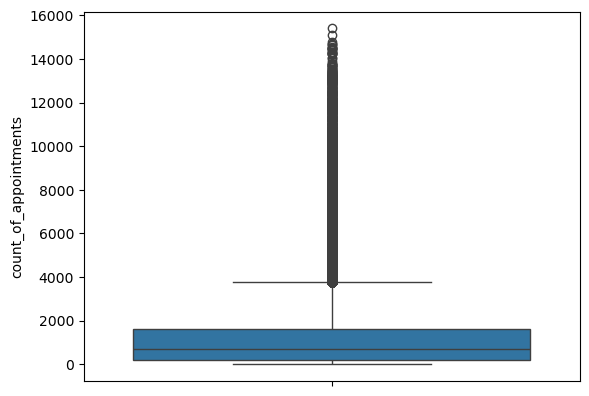

In [15]:
#Produce a boxplot for the count of appointments from the actual appointments data
axes=sns.boxplot(ad["count_of_appointments"],whis=1.5)
axes.get_figure().savefig("actual_box.png")

This shows a high number of outliers above the 1.5 IQR mark. There is not a clear justification for removing these outliers so they will be left in place.

In [17]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv(r"C:\Users\jps16\OneDrive\Documents\Career Accelerator\Course 2\Assignment\LSE_DA201_Assignment_files\appointments_regional.csv")

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [18]:
# Determine whether there are missing values in the regional appointments data set
ar_na=ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [19]:
#Perform a similar check for nulls
ar_null=ar[ar.isnull().any(axis=1)]
ar_null.shape

(0, 7)

In [20]:
#Check for duplicates
ar_dupes=ar[ar.duplicated()]
ar_dupes.shape

(21604, 7)

In [21]:
# Determine the metadata of the regional appointments data set.
print(f"Shape: {ar.shape}\n")
print(f"Column names: \n {ar.columns}\n")
print(f"Data types: \n {ar.dtypes} \n")
print(f"Info: \n")
print(ar.info())


Shape: (596821, 7)

Column names: 
 Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

Data types: 
 icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object 

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-nul

In [22]:
# Determine the descriptive statistics of the regional appointments data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


<Axes: ylabel='count_of_appointments'>

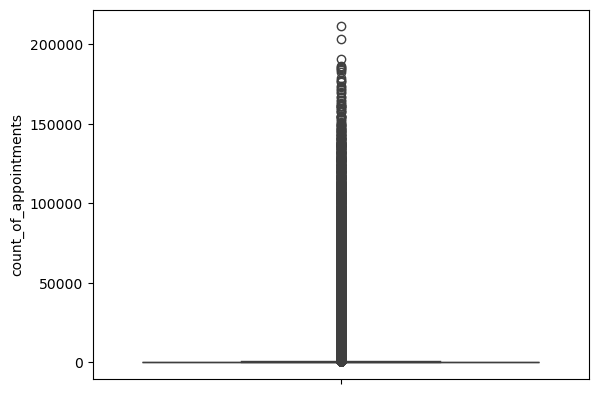

In [23]:
#Produce a boxplot for count of appointments in the regional file
sns.boxplot(ar["count_of_appointments"],whis=1.5)

The boxplot shows a large number of high outliers above 1.5*IQR.  
No clear justification for removing these exists-  some groupings may have larger numbers of appointments.

In [25]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel(r"C:\Users\jps16\OneDrive\Documents\Career Accelerator\Course 2\Assignment\LSE_DA201_Assignment_files\national_categories.xlsx")

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05
...,...,...,...,...,...,...,...,...
817389,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Social Prescribing Service,1,2022-06
817390,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,Other,Care Related Encounter,Unplanned Clinical Activity,1,2022-06
817391,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Group Consultation and Group Education,1,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Care Home Visit,1,2022-06


In [26]:
# Determine whether there are missing values in the national categories dataset.
nc_na=nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [27]:
# Perform a similar check for nulls
nc_null=nc[nc.isnull().any(axis=1)]
nc_null.shape

(0, 8)

In [28]:
#Check for duplicates
nc_dupes=nc[nc.duplicated()]
nc_dupes.shape

(0, 8)

In [29]:
# Determine the metadata of the national categories data set.
print(f"Shape: {nc.shape}\n")
print(f"Column names: \n {nc.columns}\n")
print(f"Data types: \n {nc.dtypes} \n")
print(f"Info: \n")
print(nc.info())


Shape: (817394, 8)

Column names: 
 Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')

Data types: 
 appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object 

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  obj

In [30]:
# Determine the descriptive statistics of the national categories data set.
nc.describe()

,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


<Axes: ylabel='count_of_appointments'>

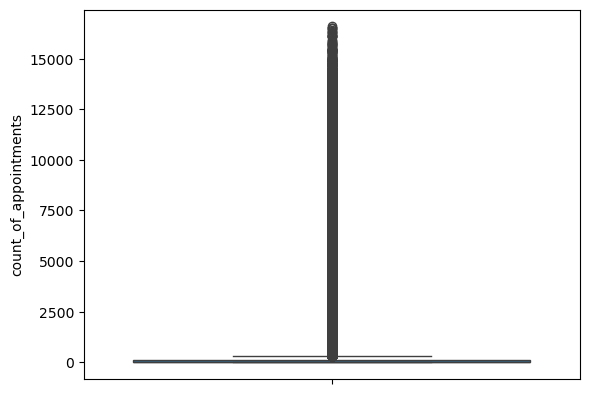

In [31]:
#Produce a boxplot for count of appointments in the national categories file
sns.boxplot(nc["count_of_appointments"],whis=1.5)

Again a lot of outliers >1.5 IQR exist.  As we are not aware of a justification for removing these they are left as is.

**Comments regarding data quality**

The data does not appear to have missing or null values in any fields.
The regional appointments data was manually inspected as Python showed duplicates. There appear to have multiple records for the same grouping of ICB, month, appointment status, hcp type, appointment mode and "time between booking and appointment category".  However these have not been treated as duplicates as many of these have differing appointment counts. It has been assumed that these entries are legitimate and they would need to be summed to give the total appointment count for the grouping.
The actual appointments and national categories data did not appear to have any duplication.

**Comments regarding descriptive statistics**

As sub-ICB's have varying sizes of patient lists, as expected there is considerable variation in the daily appointment count in the actual appointments data (minimum 1, maximum 15400, mean 1219, standard deviation 1547 all rounded to the nearest whole number)

We also see a large variation in the regional appointments data (minimum 1, maximum 211265, mean 1245, standard deviation 5457 all rounded to the nearest whole number).  As this data is grouped at ICB and month level as opposed to sub-ICB level and daily, we see larger appointment totals but again a large spread in the data.

Finally the national categories data shows a similar wide spread (minimum 1, maximum 16590, mean 362, standard deviation 1085 rounded).  

As the aggregations vary across these three datasets these differences are not unexpected.

All three datasets have a lot of outliers above 1.5 IQR, but no justification to remove these is apparent.

### Initial investigations

#### How many locations are there in the data set?

In [37]:
# Determine the number of locations of various types

# Region is the highest level and is in the actual appointments data
regionCountList=list(ad['region_ons_code'].value_counts())
print(f"There are {len(regionCountList)} distinct ONS region codes in the actual appointments data")

#ICB is the next level and appears in all three datasets
icbCountActualAppts=list(ad['icb_ons_code'].value_counts())
print(f"There are {len(icbCountActualAppts)} distinct ONS ICB codes in the actual appointments data")

icbCountRegionalAppts=list(ar['icb_ons_code'].value_counts())
print(f"There are {len(icbCountRegionalAppts)} distinct ONS ICB codes in the regional appointments data")

icbCountNationalCats=list(nc['icb_ons_code'].value_counts())
print(f"There are {len(icbCountNationalCats)} distinct ONS ICB codes in the national categories data")

#Sub-ICB is the lowest level and appears in the actual appointments file as sub_icb_location_code,sub_icb_location_ons_code and sub_icb_location_name
#It also appears in the national categories file as sub_icb_location_name

subICBCodeCountActualAppts=list(ad['sub_icb_location_code'].value_counts())
print(f"There are {len(subICBCodeCountActualAppts)} distinct sub-icb location codes in the actual appointments data")

subICBONSCodeActualAppts=list(ad['sub_icb_location_ons_code'].value_counts())
print(f"There are {len(subICBONSCodeActualAppts)} distinct sub-icb location ons codes in the actual appointments data")

subICBNamesActualAppts=list(ad['sub_icb_location_name'].value_counts())
print(f"There are {len(subICBNamesActualAppts)} distinct sub-icb location names in the actual appointments data")

subICBNamesNationalCats=list(nc['sub_icb_location_name'].value_counts())
print(f"There are {len(subICBNamesNationalCats)} distinct sub-icb location names in the national categories data")

There are 7 distinct ONS region codes in the actual appointments data
There are 42 distinct ONS ICB codes in the actual appointments data
There are 42 distinct ONS ICB codes in the regional appointments data
There are 42 distinct ONS ICB codes in the national categories data
There are 106 distinct sub-icb location codes in the actual appointments data
There are 106 distinct sub-icb location ons codes in the actual appointments data
There are 106 distinct sub-icb location names in the actual appointments data
There are 106 distinct sub-icb location names in the national categories data


The above investigation shows that there are 7 regions, 42 ICBs and 106 sub-ICB's in the data and that where multiple sources have the ICB or sub-ICB, the same number of different values are present.

#### What are the five locations with the highest number of appointments?
We will use the actual appointments file, which covers December 2021 to June 2022 inclusive 

In [40]:
#First, we group by region, which we can do with the actual appointments data and sort by sum of appointments descending
adRegionGroup=ad.groupby(['region_ons_code'])['count_of_appointments'].sum()

#We now have a series with the region code as the index and the appointments sum as the value
#Sort descending and take top 5
adRegionGroup=adRegionGroup.sort_values(ascending=False)
adRegionGroup=adRegionGroup.nlargest(5)

#Produce comma-separated list of regions
regions=','.join(adRegionGroup.index.values.astype(str))

print(f"The five regions with the largest number of appointments are: {regions}")
adRegionGroup

The five regions with the largest number of appointments are: E40000011,E40000012,E40000005,E40000003,E40000010


region_ons_code
E40000011    32574555
E40000012    27425610
E40000005    25577953
E40000003    24488519
E40000010    19880924
Name: count_of_appointments, dtype: int64

In [41]:
#We can then perform a similar exercise with the actual appointments data but grouping by icb code to produce the five icb's 
#with the highest number of appointments.
#This gives a series with the icb code as the index and the appointments sum as the value

adICBGroup=ad.groupby(['icb_ons_code'])['count_of_appointments'].sum()

#The below gives us the top 5 icbs sorted by descending number of appointments
adICBGroup=adICBGroup.sort_values(ascending=False).nlargest(5)

icbs=','.join(adICBGroup.index.values.astype(str))

print(f"The five ICB's with the largest number of appointments are: {icbs}")
adICBGroup

The five ICB's with the largest number of appointments are: E54000050,E54000054,E54000057,E54000008,E54000027


icb_ons_code
E54000050    9584943
E54000054    8291440
E54000057    7650341
E54000008    7344348
E54000027    6976986
Name: count_of_appointments, dtype: int64

In [42]:
#Finally grouping the actual appointments by sub-icb to produce the five sub-icb's with the highest number of appointments
#This gives a series with the sub-icb code as the index and the appointments sum as the value

adSubICBGroup=ad.groupby(['sub_icb_location_ons_code'])['count_of_appointments'].sum()

adSubICBGroup=adSubICBGroup.sort_values(ascending=False).nlargest(5)

subIcbs=','.join(adSubICBGroup.index.values.astype(str))

print(f"The five sub-ICB's with the largest number of appointments are: {subIcbs}")
adSubICBGroup

The five sub-ICB's with the largest number of appointments are: E38000256,E38000255,E38000237,E38000253,E38000244


sub_icb_location_ons_code
E38000256    6976986
E38000255    5341883
E38000237    5209641
E38000253    4712737
E38000244    4360079
Name: count_of_appointments, dtype: int64

#### How many service settings, context types, national categories, and appointment statuses are there?

In [44]:
# Determine the number of service settings.
settingCountList=list(nc['service_setting'].value_counts())
print(f"There are {len(settingCountList)} distinct service settings in the national categories data")

#Print as comma separated list
print(f"The service settings are: {','.join(nc['service_setting'].unique().astype(str))}")


There are 5 distinct service settings in the national categories data
The service settings are: General Practice,Unmapped,Primary Care Network,Other,Extended Access Provision


In [45]:
# Determine the number of context types.
contextCountList=list(nc['context_type'].value_counts())
print(f"There are {len(contextCountList)} distinct context types in the national categories data")

#Print as comma separated list
print(f"The context types are: {','.join(nc['context_type'].unique().astype(str))}")

There are 3 distinct context types in the national categories data
The context types are: Care Related Encounter,Inconsistent Mapping,Unmapped


In [46]:
# Determine the number of national categories.
nationalCatList=list(nc['national_category'].value_counts())
print(f"There are {len(nationalCatList)} distinct national categories in the national categories data")

#Print as newline separated list
print(f"The national types are: \n {'\n'.join(nc['national_category'].unique().astype(str))}")


There are 18 distinct national categories in the national categories data
The national types are: 
 General Consultation Routine
Planned Clinical Procedure
Planned Clinics
General Consultation Acute
Clinical Triage
Inconsistent Mapping
Unmapped
Structured Medication Review
Service provided by organisation external to the practice
Walk-in
Unplanned Clinical Activity
Non-contractual chargeable work
Home Visit
Patient contact during Care Home Round
Care Home Needs Assessment & Personalised Care and Support Planning
Social Prescribing Service
Care Home Visit
Group Consultation and Group Education


In [47]:
# Determine the number of appointment statuses from the regional appointments data
appointmentStatusList=list(ar['appointment_status'].value_counts())
print(f"There are {len(appointmentStatusList)} distinct appointment statuses in the regional appointments data")

#Print as newline separated list
print(f"The appointment statuses are: {','.join(ar['appointment_status'].unique().astype(str))}")

There are 3 distinct appointment statuses in the regional appointments data
The appointment statuses are: Attended,DNA,Unknown


# Detailed exploration of the data

#### Between what dates were appointments scheduled? 

In [50]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()["appointment_date"]

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [51]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
ar.head()["appointment_month"]

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object

In [52]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()["appointment_date"]

0   2022-05-09
1   2022-05-23
2   2021-10-11
3   2021-10-18
4   2022-05-16
Name: appointment_date, dtype: datetime64[ns]

We can see that appointment_date is already a datetime in the nc dataframe. We will change the appointment_date column in
the ad dataframe and the appointment_month column in the ar dataframe to be a datetime.

In [54]:
# Change ad['appointment_date'] to a datetime
ad['appointment_date']=pd.to_datetime(ad['appointment_date'],format='%d-%b-%y')

# View the DateFrame and check new data tyoe.
print(ad["appointment_date"].dtypes)
ad.head()

datetime64[ns]


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [55]:
# Change ar['appointment_date'] to a datetime, 2021-01 format, leaving day to default to 1st
ar['appointment_month']=pd.to_datetime(ar['appointment_month'],format='%Y-%m')

# View the DateFrame and check the new datatype.
print(ar['appointment_month'].dtypes)
ar.head()

datetime64[ns]


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [56]:
# Determine the minimum and maximum dates in the ad DataFrame.
print(f"Appointment date in actual appointments file covers range {ad['appointment_date'].min().strftime('%Y-%m-%d')} to "
      f"{ad['appointment_date'].max().strftime('%Y-%m-%d')}")

Appointment date in actual appointments file covers range 2021-12-01 to 2022-06-30


In [57]:
# Determine the minimum and maximum dates in the ar DataFrame.
print(f"Appointment month in regional appointments file covers range {ar['appointment_month'].min().strftime('%B %Y')} to "
      f"{ar['appointment_month'].max().strftime('%B %Y')}")

Appointment month in regional appointments file covers range January 2020 to June 2022


In [58]:
# Determine the minimum and maximum dates in the nc DataFrame.
print(f"Appointment date in national categories file covers range {nc['appointment_date'].min().strftime('%Y-%m-%d')} to "
      f"{nc['appointment_date'].max().strftime('%Y-%m-%d')}")

Appointment date in national categories file covers range 2021-08-01 to 2022-06-30


**Date range of the provided data sets**

The date ranges in the 3 data sources differ. Actual appointments covers December 2021 to June 2022 inclusive.  Regional appointments covers January 2020 to June 2022 inclusive, and national categories covers August 2021 to June 2022.

*The largest period covered by all 3 datasets is therefore December 2021 to June 2022 inclusive.*

**Comparison of the number of appointments in each file in the overlapping range**

In [61]:

#Create variables for the start and end of the date range for which the 3 files overlap
start=datetime.strptime("2021-12-01","%Y-%m-%d")
end=datetime.strptime("2022-06-30","%Y-%m-%d")

#Find the number of appointments from the actual appointments file in the range
ad_date_subset=ad[(ad['appointment_date']>=start) & (ad['appointment_date']<=end)]
ad_appts=ad_date_subset["count_of_appointments"].sum()

#Find the number of appointments from the regional appointments file in the range
ar_date_subset=ar[(ar['appointment_month']>=start) & (ar['appointment_month']<=end)]
ar_appts=ar_date_subset["count_of_appointments"].sum()

#Find the number of appointments from the national categories file in the range
nc_date_subset=nc[(nc['appointment_date']>=start) & (nc['appointment_date']<=end)]
nc_appts=nc_date_subset["count_of_appointments"].sum()

print(f"In the range {start.strftime("%Y-%m-%d")} to {end.strftime("%Y-%m-%d")} the actual appointments file has {ad_appts} appointments,\n"
         + f"the regional appointments file has {ar_appts} and the national categories file has {nc_appts}")

In the range 2021-12-01 to 2022-06-30 the actual appointments file has 167980692 appointments,
the regional appointments file has 182963194 and the national categories file has 182963194


The regional and national categories file have the same number of apppointments (182963194) for December 2021 to June 2022 inclusive.  
The actual appointments file has fewer appointments (167980692) but it is assumed this is due to missed appointments (status DNA) not being recorded 
in that file, which makes sense.

#### Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [64]:
# Produce a subset of data for the sub-icb location
nc_nwlondon_subset=nc[nc["sub_icb_location_name"]=="NHS North West London ICB - W2U3Z"]

# View the shape and first 5 rows.
print(nc_nwlondon_subset.shape)
nc_nwlondon_subset.head()

(13007, 8)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
40,2022-06-13,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,15324,2022-06
47,2022-05-16,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,15056,2022-05
51,2022-05-09,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,14964,2022-05
56,2022-05-23,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,14907,2022-05
58,2022-05-17,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,14904,2022-05


In [65]:
#Group the data by service setting and sum the count of appointments for each setting. Sort the resulting series descending.
nc_nwlondon_subset.groupby("service_setting")["count_of_appointments"].sum().sort_values(ascending=False)

service_setting
General Practice             10432225
Unmapped                       904234
Other                          343642
Primary Care Network           240283
Extended Access Provision      222006
Name: count_of_appointments, dtype: int64

We can see that in this ICB "General Practice" has the highest number of booked appointments.

#### Which month had the highest number of appointments?

In [68]:
#group by appointment date month and year
nc_month_group=nc.groupby([nc.appointment_date.dt.month_name(),nc.appointment_date.dt.year])
#sum the count of appointments for each group
nc_month_group["count_of_appointments"].sum().sort_values(ascending=False)

appointment_date  appointment_date
November          2021                30405070
October           2021                30303834
March             2022                29595038
September         2021                28522501
May               2022                27495508
June              2022                25828078
January           2022                25635474
February          2022                25355260
December          2021                25140776
April             2022                23913060
August            2021                23852171
Name: count_of_appointments, dtype: int64

We can see that November 2021 had the largest number of appointments in the national categories data

#### What are the descriptive statistics for the number of appointments per month in the datasource?

In [71]:
#Print std.dev pop, range and mean of a series
def printStats(series,friendly_name):

    print(f"The descriptive statistics of the {friendly_name} are:")
    #Calculate and display the population standard deviation rounded
    std_dev=round(series.std(ddof=0))
    print(f"The population standard deviation is {std_dev}")
    
    #Calculate and display the range
    range=series.max()-series.min()
    print(f"The range is {range}")
    
    #Calculate and display the mean
    mean=round(series.mean())
    print(f"The mean is {mean}")

# Determine the total appointments per month in the actual appointments dataset
ad["appointment_month_name"]=ad["appointment_date"].dt.month_name()
ad["appointment_year"]=ad["appointment_date"].dt.year
ad["appointment_month_ordinal"]=ad["appointment_date"].dt.month

ad_month_group=ad.groupby(["appointment_month_ordinal","appointment_year","appointment_month_name"])["count_of_appointments"].sum()
              
printStats(ad_month_group,"actual appointments per month")

The descriptive statistics of the actual appointments per month are:
The population standard deviation is 1605356
The range is 5221188
The mean is 23997242


In [72]:
# Similar group and sum for the regional dataset
ar_month_group=ar.groupby([ar.appointment_month.dt.month_name(),ar.appointment_month.dt.year])["count_of_appointments"].sum()

printStats(ar_month_group,"appointments booked in the regional file")
ar_month_group

The descriptive statistics of the appointments booked in the regional file are:
The population standard deviation is 3414396
The range is 14397189
The mean is 24760151


appointment_month  appointment_month
April              2020                 16007881
                   2021                 23879932
                   2022                 23913060
August             2020                 20150520
                   2021                 23852171
December           2020                 23535936
                   2021                 25140776
February           2020                 24104621
                   2021                 22399569
                   2022                 25355260
January            2020                 27199296
                   2021                 22492069
                   2022                 25635474
July               2020                 22491437
                   2021                 25739219
June               2020                 20690805
                   2021                 26784182
                   2022                 25828078
March              2020                 24053468
                   2021         

In [73]:
# Similar process for the national categories dataset
nc_month_group=nc.groupby([nc.appointment_date.dt.month_name(),nc.appointment_date.dt.year])["count_of_appointments"].sum()

printStats(nc_month_group,"appointments booked in the national categories file")
nc_month_group

The descriptive statistics of the appointments booked in the national categories file are:
The population standard deviation is 2346375
The range is 6552899
The mean is 26913343


appointment_date  appointment_date
April             2022                23913060
August            2021                23852171
December          2021                25140776
February          2022                25355260
January           2022                25635474
June              2022                25828078
March             2022                29595038
May               2022                27495508
November          2021                30405070
October           2021                30303834
September         2021                28522501
Name: count_of_appointments, dtype: int64

The measures of spread are higher for the regional data, but this does include the COVID period.

#### Which appointment modes are most frequently used?

In [76]:
#Group the regional appointments data by appointment mode
ar_appointment_group=ar.groupby("appointment_mode")

#Show the total of appointments of each mode
ar_appointment_group["count_of_appointments"].sum().sort_values(ascending=False)

appointment_mode
Face-to-Face    439981729
Telephone       267862657
Unknown          26451305
Home Visit        4887876
Video/Online      3620958
Name: count_of_appointments, dtype: int64

We can see that **face-to-face** appointments are by far the most popular with almost 440 million between January 2020 to June 2022.
Telephone appointments were the second most popular mode with around 268 million.  Other modes combined (including unknown) total around 35 million so are less significant.

#### What is the percentage of missed appointments?


In [79]:
#Calculate the percentage of missed (DNA) appointments as sum of missed/all
all_appointments=ar["count_of_appointments"].sum()
missed_appointments=ar[ar["appointment_status"]=="DNA"]["count_of_appointments"].sum()

missed_percentage=(missed_appointments/all_appointments)*100

print(f"{round(missed_percentage,2)}% of appointments were missed (DNA), representing {missed_appointments} appointments \
from a total of {all_appointments}")

4.16% of appointments were missed (DNA), representing 30911233 appointments from a total of 742804525


# Visualisations

In [81]:
# Create an appointment month date, which will be the first of the appointment month as a datetime
#This will assist later with plotting
nc["appointment_month_date"]=pd.to_datetime(nc["appointment_month"],format="%Y-%m")

In [82]:
# Aggregate on month date and determine the sum of records per month and service setting
# Use reset index so that appointment_month is repeated in each group of the same month
nc_monthly_service_settings=nc.groupby(["appointment_month_date","service_setting"])["count_of_appointments"].sum().reset_index()

# View output.
nc_monthly_service_settings.head()

,appointment_month_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,160927
1,2021-08-01,General Practice,21575852
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843


**Service settings:**

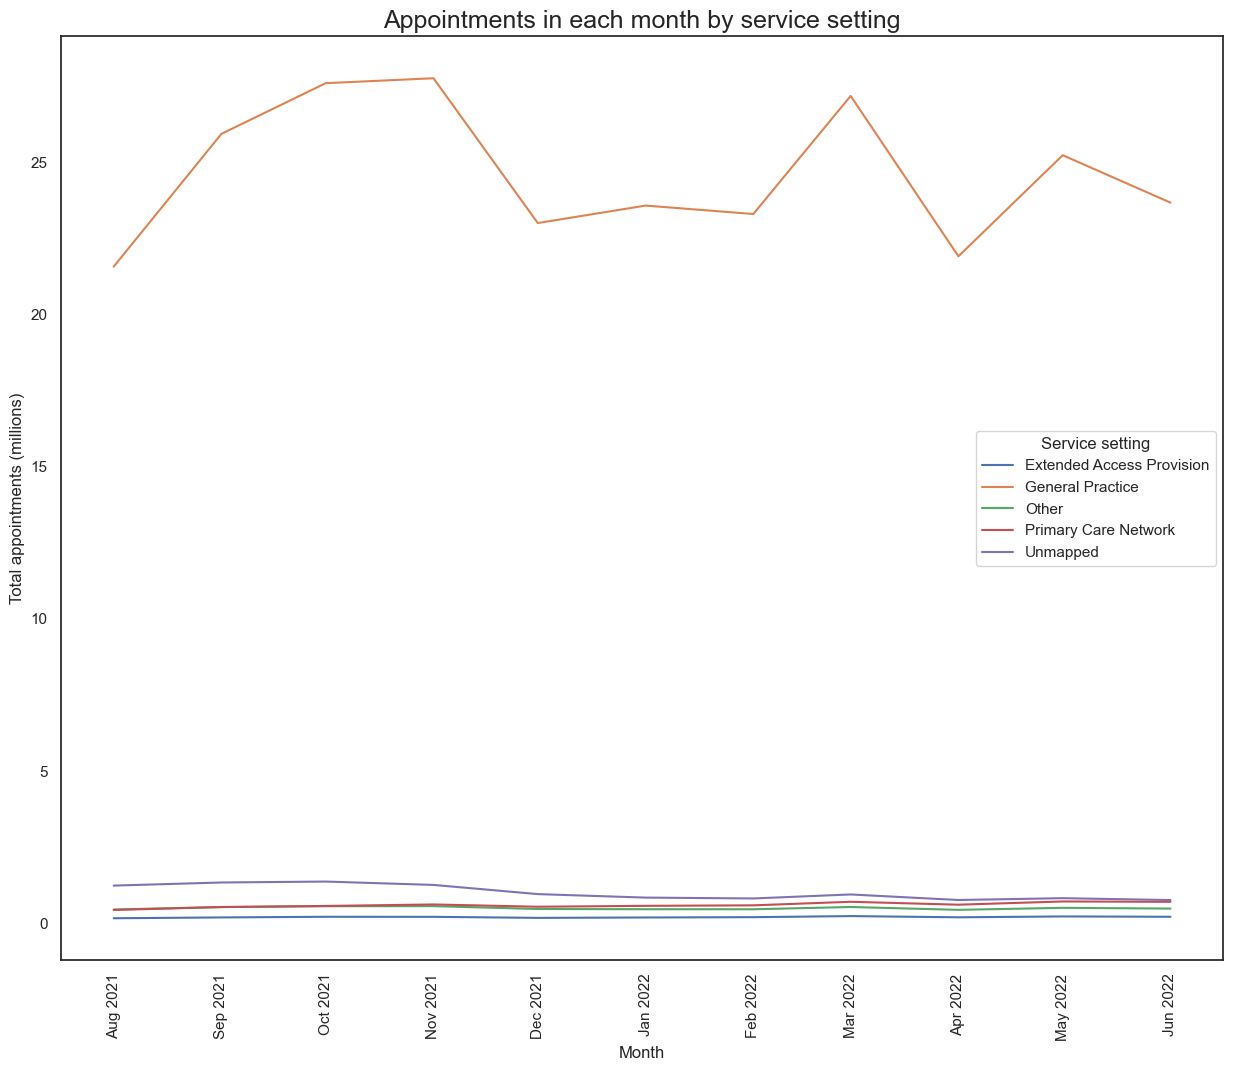

In [417]:
#Format the y axis of the matplotlib axes passed in millions
def formatInMillions(axes):
    scale_y = 1000000
    #Define a custom formatter returning the value divided by a million in 1.1 format
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    #Apply to y axis
    axes.yaxis.set_major_formatter(ticks_y)

#Set figure size
sns.set(rc={"figure.figsize":(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Plot appointments for each month, with a different coloured line for each service setting
axes=sns.lineplot(data=nc_monthly_service_settings,x="appointment_month_date",y="count_of_appointments",hue="service_setting",sort=True)

#Rotate x axis labels for readability
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)

#Set axis labels and chart titles
axes.set_xlabel("Month")
axes.set_ylabel('Total appointments (millions)')
axes.set_title("Appointments in each month by service setting",fontsize=18)
axes.legend(title="Service setting")

#Define a DateFormatter to format the month dates in Dec 2021 format
monthFormatter=mdates.DateFormatter("%b %Y")
axes.xaxis.set_major_formatter(monthFormatter)

#Rescale y axis to use millions
formatInMillions(axes)

#Export as png
axes.get_figure().savefig("service_settings.png")


We see that the vast majority of appointments are in the "General Practice setting" with particular peaks in early winter and spring. 

**Context types:**

In [420]:
# Aggregate by month and context type and sum appointments, resetting index so that month in repeated within the group
nc_monthly_context_types=nc.groupby(["appointment_month_date","context_type"])["count_of_appointments"].sum().reset_index()

# View output.
nc_monthly_context_types.head()

,appointment_month_date,context_type,count_of_appointments
0,2021-08-01,Care Related Encounter,20255235
1,2021-08-01,Inconsistent Mapping,2363093
2,2021-08-01,Unmapped,1233843
3,2021-09-01,Care Related Encounter,24404251
4,2021-09-01,Inconsistent Mapping,2782135


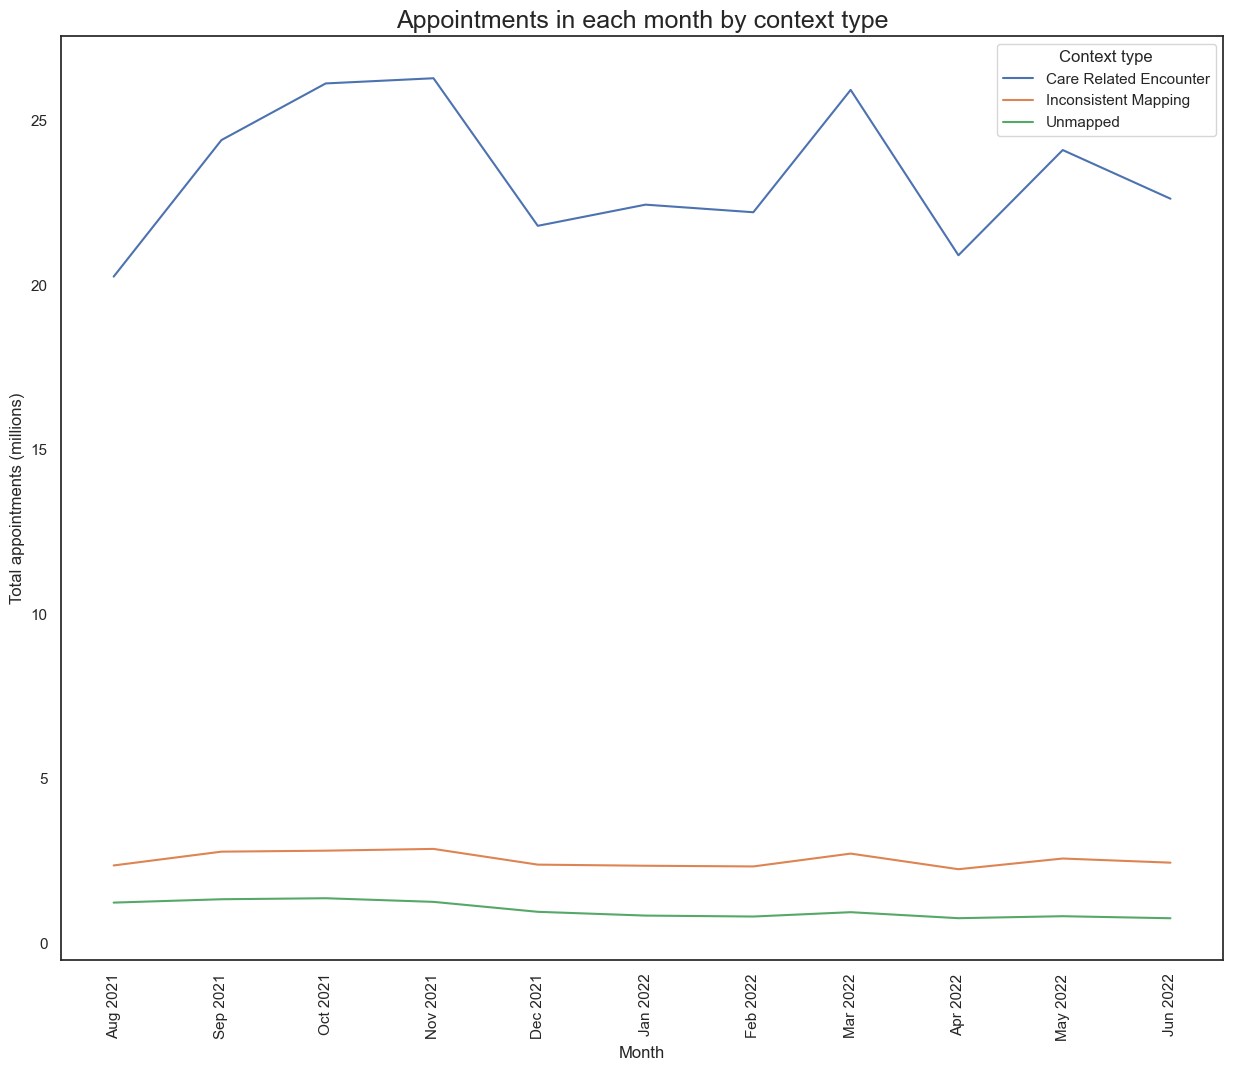

In [421]:
# Plot appointments for each month, with a different coloured line for each context type 
axes=sns.lineplot(data=nc_monthly_context_types,x="appointment_month_date",y="count_of_appointments",hue="context_type")

#Rotate x axis labels for readability
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)

#Set axis labels and chart titles
axes.set_xlabel("Month")
axes.set_ylabel('Total appointments (millions)')
axes.set_title("Appointments in each month by context type",fontsize=18)
axes.legend(title="Context type")

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Rescale y axis to use millions
formatInMillions(axes)

#Export as png
axes.get_figure().savefig("context_types.png")

We can see that the vast majority of appointments are in the "Care related encounter" context type.  There is a peak in Autumn and again in Spring.

**National categories:**

In [424]:
# Aggregate by month and national category and sum appointments, resetting index so that month in repeated within the group
nc_monthly_nat_categories=nc.groupby(["appointment_month_date","national_category"])["count_of_appointments"].sum().reset_index()

# View output.
nc_monthly_nat_categories.head()


,appointment_month_date,national_category,count_of_appointments
0,2021-08-01,Care Home Needs Assessment & Personalised Care and Support Planning,29676
1,2021-08-01,Care Home Visit,47583
2,2021-08-01,Clinical Triage,3704207
3,2021-08-01,General Consultation Acute,4280920
4,2021-08-01,General Consultation Routine,7756045


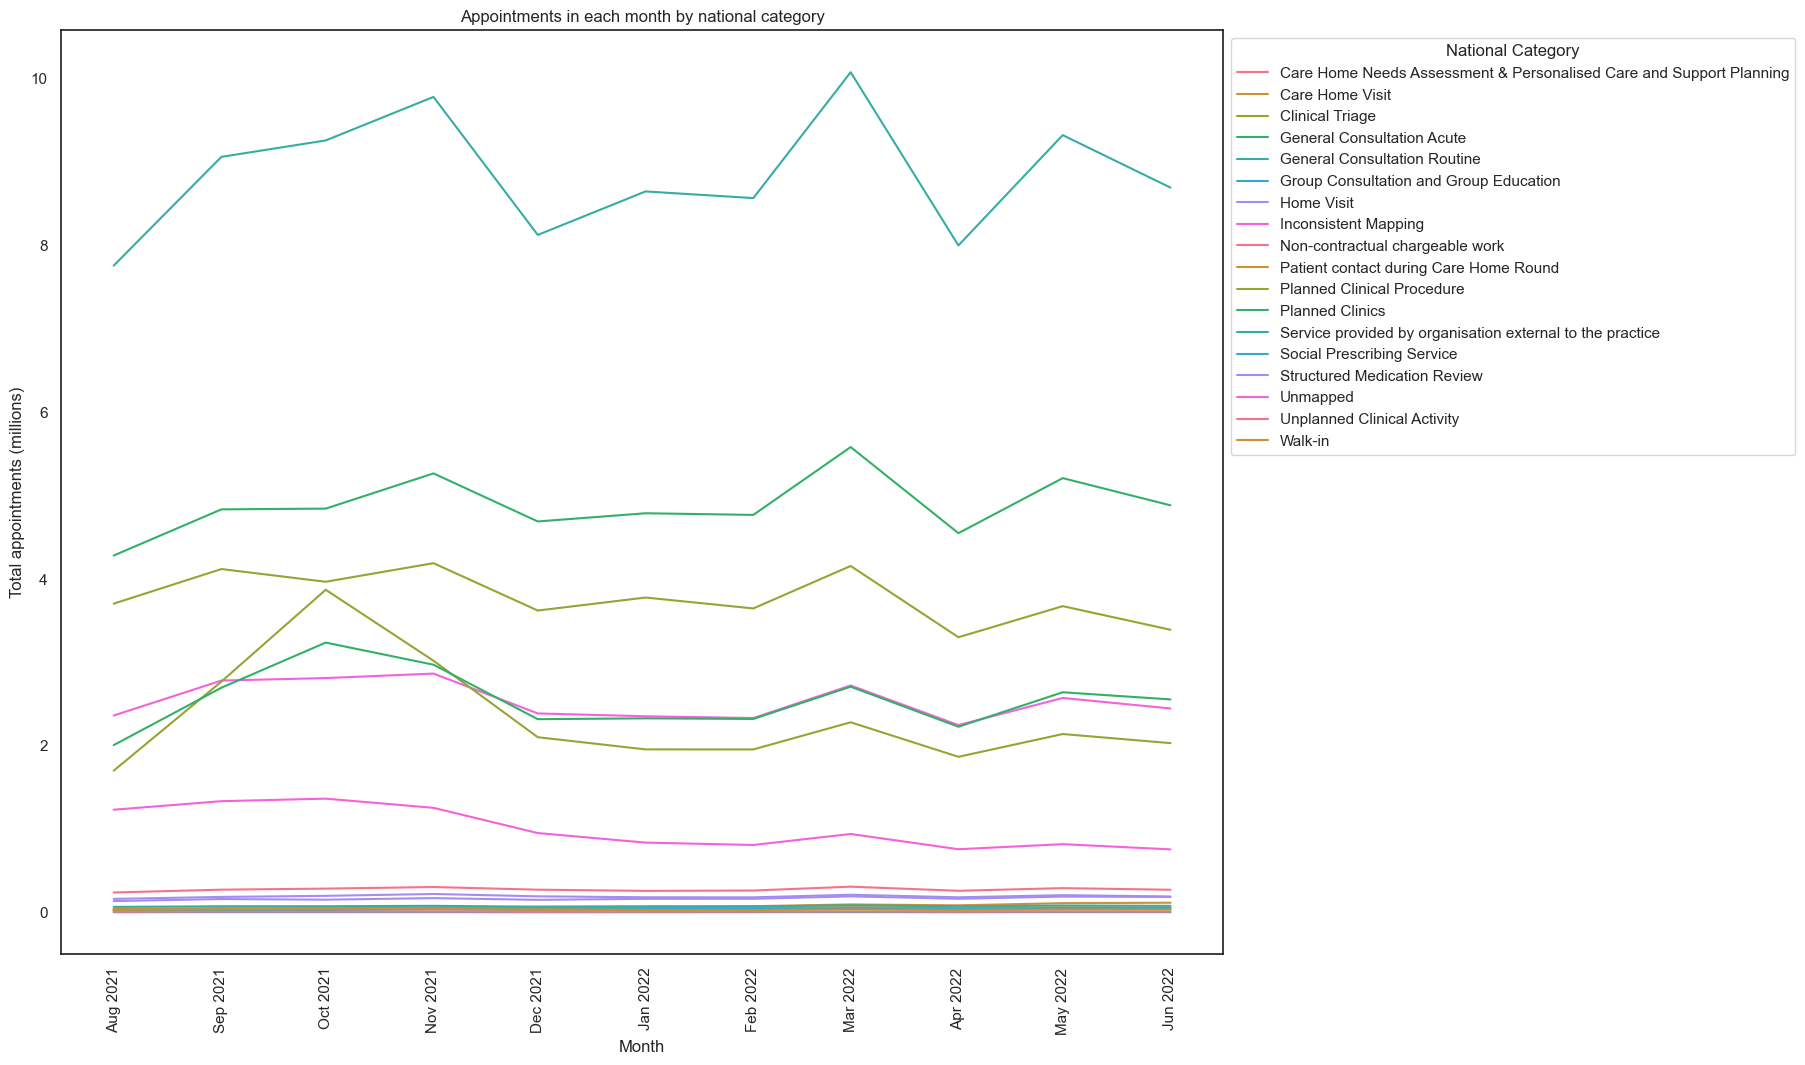

In [425]:
# Plot appointments for each month, with a different coloured line for each context type 

#Try and apply more varying colours to the lines
palette=sns.color_palette("husl", 8)
axes=sns.lineplot(data=nc_monthly_nat_categories,x="appointment_month_date",y="count_of_appointments",hue="national_category",palette=palette)

#Rotate x axis labels for readability
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)

#Set axis labels and chart titles
axes.set_xlabel("Month")
axes.set_ylabel('Total appointments (millions)')
axes.set_title("Appointments in each month by national category")
axes.legend(title="National Category")

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Rescale y axis to use millions
formatInMillions(axes)

#Move legend outside the chart
sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 1))

We see again a similar peak in appointments in each category around Autumn and Spring but including all categories results in a somewhat cluttered visual, although it can be seen that the seasonal trends are again peaks in Autumn and Spring.  

It seems more instructive to create sets of categories.  We will leave "General Consultation Acute","General Consultation Routine", "Planned Clinical Procedure" and "Clinical Triage" to be shown separately as they have the largest number of appointments. We will group other categories under "Other Categories"

In [427]:
#Function to group national categories as we require
def categoryGroup(category):
    separateCats=["General Consultation Acute","General Consultation Routine", \
                  "Planned Clinical Procedure","Clinical Triage"]
    
    if category in separateCats:
        return category
    else:
        return "Other Categories"

#Create new column applying the function to national category
nc["category_group"]=nc["national_category"].apply(categoryGroup)

#View grouping to verify they are correct
nc.groupby(["national_category","category_group"]).size()

#Group by month and category for plotting and sum appointments
nc_month_and_catgroup=nc.groupby(["appointment_month_date","category_group"])["count_of_appointments"].sum().reset_index()
        

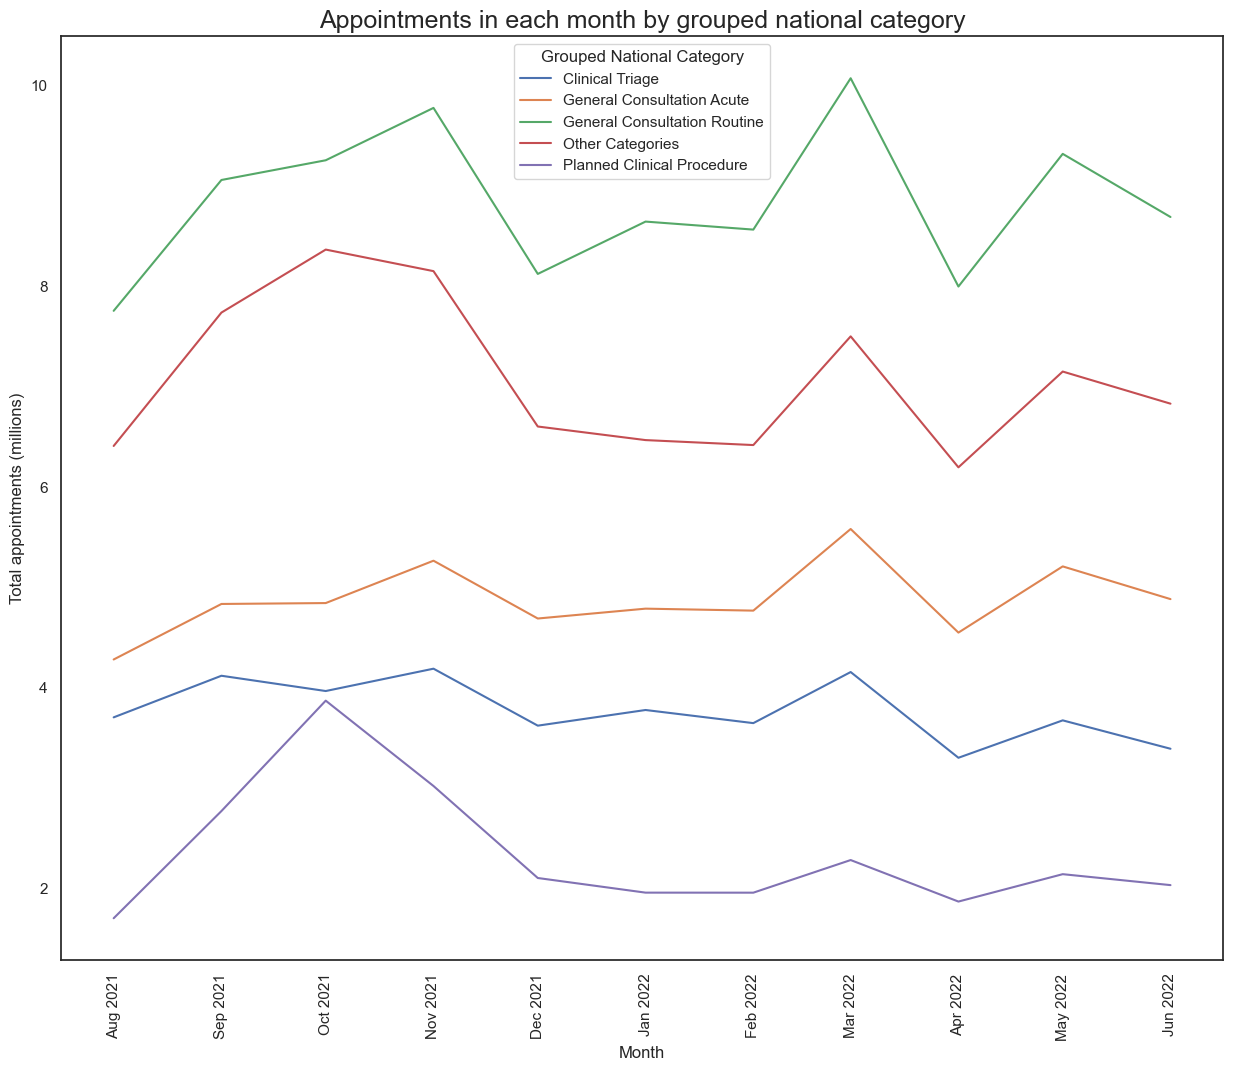

In [428]:
#Plot appointment month against count of appointments, adding a different coloured line for each category group
axes=sns.lineplot(data=nc_month_and_catgroup,x="appointment_month_date",y="count_of_appointments",hue="category_group")

#Rotate x axis labels for readability
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)

#Set axis labels and chart titles
axes.set_xlabel("Month")
axes.set_ylabel('Total appointments (millions)')
axes.set_title("Appointments in each month by grouped national category", fontsize=18)
axes.legend(title="Grouped National Category")

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Rescale y axis to use millions
formatInMillions(axes)

#Export as png
axes.get_figure().savefig("national_cats.png")

General consultations (acute and routine) show a spike in Autumn and in Spring.  Planned clinical procedures also show a spike in October.

We will now review the seasonal variation using the regional data, which covers a larger time period.  We will use appointment mode to provide a further level of aggregation.

In [431]:
# Subset to include only the required columns
ar_subset=ar[["appointment_month","appointment_mode","count_of_appointments"]]
ar_subset.head()

,appointment_month,appointment_mode,count_of_appointments
0,2020-01-01,Face-to-Face,8107
1,2020-01-01,Face-to-Face,6791
2,2020-01-01,Face-to-Face,20686
3,2020-01-01,Face-to-Face,4268
4,2020-01-01,Face-to-Face,11971


In [432]:
# Group by appointment month and mode and sum appointments
ar_month_group=ar_subset.groupby(["appointment_month","appointment_mode"])["count_of_appointments"].sum().reset_index()

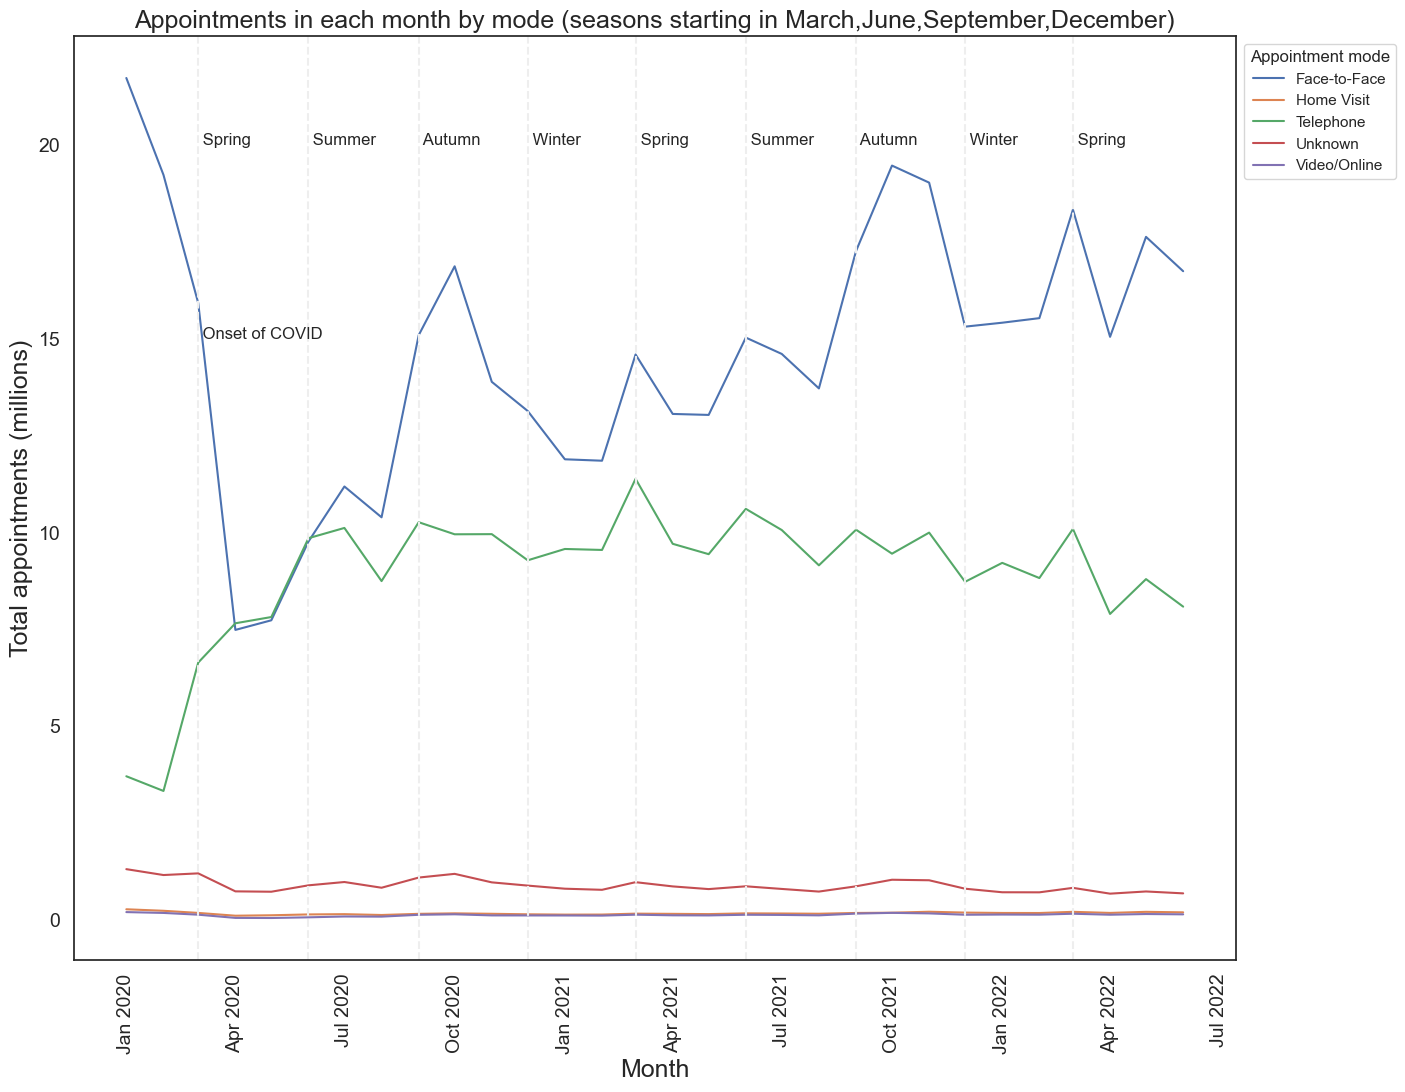

In [433]:
#Function draws a vertical line on the axes at date represented by dateString in yyyy-mm-dd format
#It adds a label at the vertical position passed in y-axis units
def lineAtDate(axes,dateString,label,vertical):
    date=datetime.strptime(dateString,'%Y-%m-%d')
    axes.axvline(date,linestyle='--',color='#eeeeee')
    axes.text(date,vertical,label)

#Plot the appointment month as a date against count of appointments, showing a different colour for each appointment type
axes=sns.lineplot(data=ar_month_group,x="appointment_month",y="count_of_appointments",hue="appointment_mode")

#Rotate x axis labels for readability
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)

#Set axis labels and chart titles
axes.set_xlabel("Month",fontsize=18)
axes.set_ylabel('Total appointments (millions)',fontsize=18)
axes.set_title("Appointments in each month by mode (seasons starting in March,June,September,December)",fontsize=18)
axes.legend(title="Appointment mode")
axes.tick_params(axis='both', which='major', labelsize=14)

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Rescale y axis to use millions
formatInMillions(axes)

#Add lines for the seasons using the function at y=20 million
lineAtDate(axes,'2020-03-01',' Spring',20e6)
lineAtDate(axes,'2020-06-01',' Summer',20e6)
lineAtDate(axes,'2020-09-01',' Autumn',20e6)
lineAtDate(axes,'2020-12-01',' Winter',20e6)
lineAtDate(axes,'2021-03-01',' Spring',20e6)
lineAtDate(axes,'2021-06-01',' Summer',20e6)
lineAtDate(axes,'2021-09-01',' Autumn',20e6)
lineAtDate(axes,'2021-12-01',' Winter',20e6)
lineAtDate(axes,'2022-03-01',' Spring',20e6)

#Add a label to indicate ramp-up of COVID March 2020
covidDate=datetime.strptime('2020-03-01','%Y-%m-%d')
axes.text(covidDate,15e6," Onset of COVID")

#Move legend outside the chart
sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 1))

#Export as png
axes.get_figure().savefig("regional_appt_mode.png")

This chart shows a large dip in face to face appointments and a corresponding rise in telephone appointments due to the COVID "lockdown" 
measures in Spring 2020.
Focussing on the general seasonality from Autumn 2020 when the pandemic receded, we see considerable spikes in face-to-face appointments in autumn but without a similar spike in telephone appointments.  However both telephone and face-to-face appointments show a spike in spring.

# Analysis of tweets from X with hashtags related to healthcare in the UK.

In [436]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [437]:
# Load the tweets dataset.
tweets_df=pd.read_csv(r'C:\Users\jps16\OneDrive\Documents\Career Accelerator\Course 2\Assignment\LSE_DA201_Assignment_files\tweets.csv')

# View the DataFrame.
tweets_df.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [438]:
# Explore the metadata.
print(tweets_df.info())
print(tweets_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None
           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std

In [439]:
# Explore the distribution of tweet_retweet_count
#sort by the index as this is tweet_retweet_count
tweets_df["tweet_retweet_count"].value_counts().sort_index()

tweet_retweet_count
0      526
1      215
2      114
3       70
4       27
5       35
6       12
7       18
8       15
9       13
10       5
11       6
12      16
13       1
14       1
15       1
16       2
19       1
20       1
23       2
24       2
35      10
37       6
39       1
40       1
41       3
44       4
48       1
49       1
53       5
54       1
57       1
62       3
63       4
68       3
72       2
73      14
76       3
78       2
79       1
85       3
107      1
150      4
169      1
207      3
208     12
303      1
Name: count, dtype: int64

The above shows that the distribution retweet count is heavily skewed right, but we can plot this below to show it clearly, focussing on values up to 
20 as higher than this values are generally low.

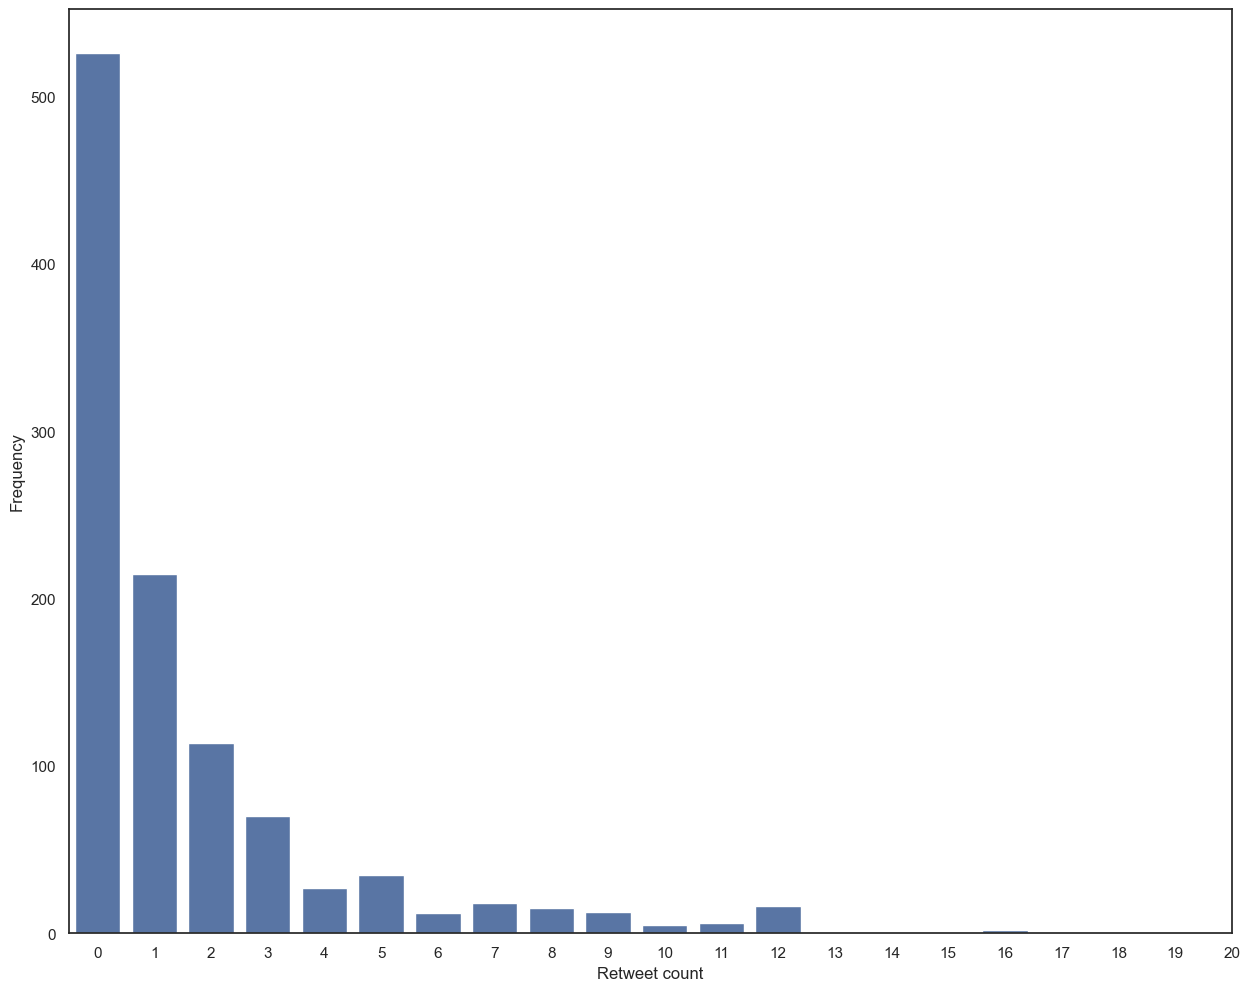

In [441]:
#Make a 2 column dataframe with retweet count and the frequency of the valies
retweet_count_df=tweets_df["tweet_retweet_count"].value_counts().reset_index()
retweet_count_df=retweet_count_df[retweet_count_df["tweet_retweet_count"]<=20]

axes=sns.barplot(data=retweet_count_df,x="tweet_retweet_count",y="count")

axes.set_xlabel("Retweet count")
axes.set_ylabel('Frequency')

#Force all x-axis ticks to be shown
axes.set_xticks(range(0, 21))
axes=axes.set_xticklabels(range(0, 21))

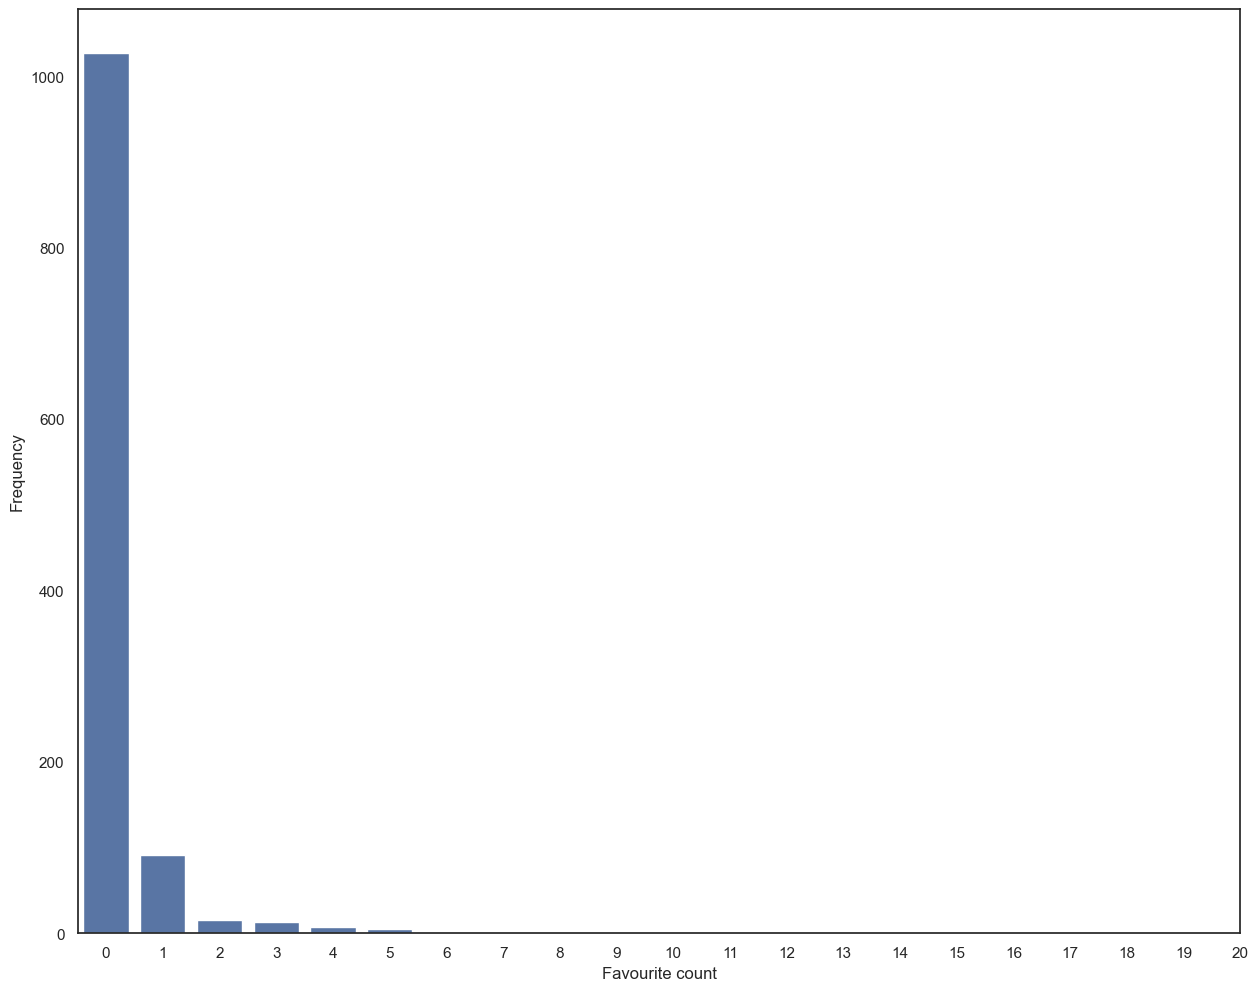

In [442]:
#Take a similar approach to show the distribution of tweet_favourite_count
favourite_count_df=tweets_df["tweet_favorite_count"].value_counts().reset_index()

axes=sns.barplot(data=favourite_count_df,x="tweet_favorite_count",y="count")

axes.set_xlabel("Favourite count")
axes.set_ylabel('Frequency')

#Force all x-axis ticks to be shown
axes.set_xticks(range(0, 21))
axes=axes.set_xticklabels(range(0, 21))

The plot shows that the distribution is skewed right. we have over 1000 tweets which were not "favourited" vs 512 which were not retweeted.

It seems reasonable to conclude that
- The majority of tweets are not retweeted or favourited, and if they are it usually on a low number of occasions
- Tweets are retweeted more than favourited.


## Analysis of hashtags

In [445]:
# Create a new DataFrame containing only the text.
tweets_text=tweets_df[["tweet_full_text","tweet_entities","tweet_entities_hashtags","tweet_metadata"]]
                       
# View the DataFrame.
tweets_text.head()

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}"
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}"
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}"


In [446]:
# Loop through the messages, and create a list of values containing the # symbol.

tags=[]

#For each tweet text, split it on spaces into "words" (which are not necessarily words they could be any text with a space either side)
for words in [tweet.split(' ') for tweet in tweets_df['tweet_full_text'].values]:
    for word in words:
        #We want hashtags i.e #some text
        if '#' in word:
            # Change to lowercase.
            tags.append(word.lower())

In [447]:
# Display the first 30 records.
tags[:30]

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare']

In [448]:
#Remove the hashtag and any text to the left to make axes more readable as we only want the hashtags themselves

clean_tags=[tag.split("#")[1] for tag in tags]
clean_tags

['healthcare',
 'premisehealth',
 'hiring',
 'healthcare',
 'new:🚨',
 'blogs',
 'digitaltransformation',
 'cybersecurity',
 'accounting',
 'finance',
 'healthcare',
 'firstcoastcna',
 'cnaexam',
 'cnaexampreparation',
 'jacksonville',
 'cnatraining',
 'nurse',
 'nursing',
 'nurselife',
 'nursepractitioner',
 'nurseproblems',
 'nursingschool',
 'healthcare',
 'new:🚨',
 'disparities.',
 'healthcare',
 'alert',
 'insurance',
 'data\nhttps://t.co/h9hlamr7p9',
 'healthcare',
 'healthcare',
 'healthcare',
 'healthcare',
 'hcldr',
 'premisehealth',
 'hiring',
 'premisehealth',
 'hiring',
 'healthcare',
 'qualitypatientcare',
 'jobs',
 'job',
 'ascp2022',
 'ascp100.',
 'healthcare',
 'healthsecretary',
 'healthcare',
 'ai,',
 'sdoh,',
 'healthcare',
 'tropicana',
 'real',
 'juice',
 'healthcare',
 'watch',
 'worms',
 'fruits',
 'healthtips',
 'tips',
 'healthcare',
 'thewoodlands,',
 'healthcare',
 'chicago,',
 'healthcare',
 'telehealth',
 'healthcare',
 'virtualcare',
 'mediqueststaffing',
 

In [449]:
#Convert to series and produce counts of each tag
tag_series=pd.Series(clean_tags)
tag_count_series=tag_series.value_counts()

#Convert to dataframe
tag_df=tag_count_series.to_frame(name="count")
tag_df=tag_df.reset_index()

#Rename index column to hashtag
tag_df.rename(columns={"index":"hashtag"},inplace=True)
print(tag_df.dtypes)
tag_df.head()

hashtag    object
count       int64
dtype: object


,hashtag,count
0,healthcare,770
1,health,83
2,ai,45
3,medicine,42
4,job,38


In [450]:
# Subset records where the count is larger than 10.
tag_df_subset=tag_df[tag_df["count"]>10]
#Verify no records with count <11
tag_df_subset["count"].sort_values()

48     11
43     11
44     11
47     11
46     11
45     11
42     12
41     12
40     12
39     12
33     13
35     13
34     13
37     13
38     13
36     13
32     14
31     14
30     14
29     15
28     15
27     15
26     16
25     16
24     16
22     16
23     16
21     17
20     17
19     17
18     18
17     18
16     21
15     22
14     24
13     24
10     25
11     25
12     25
9      26
8      28
7      30
6      30
5      35
4      38
3      42
2      45
1      83
0     770
Name: count, dtype: int64

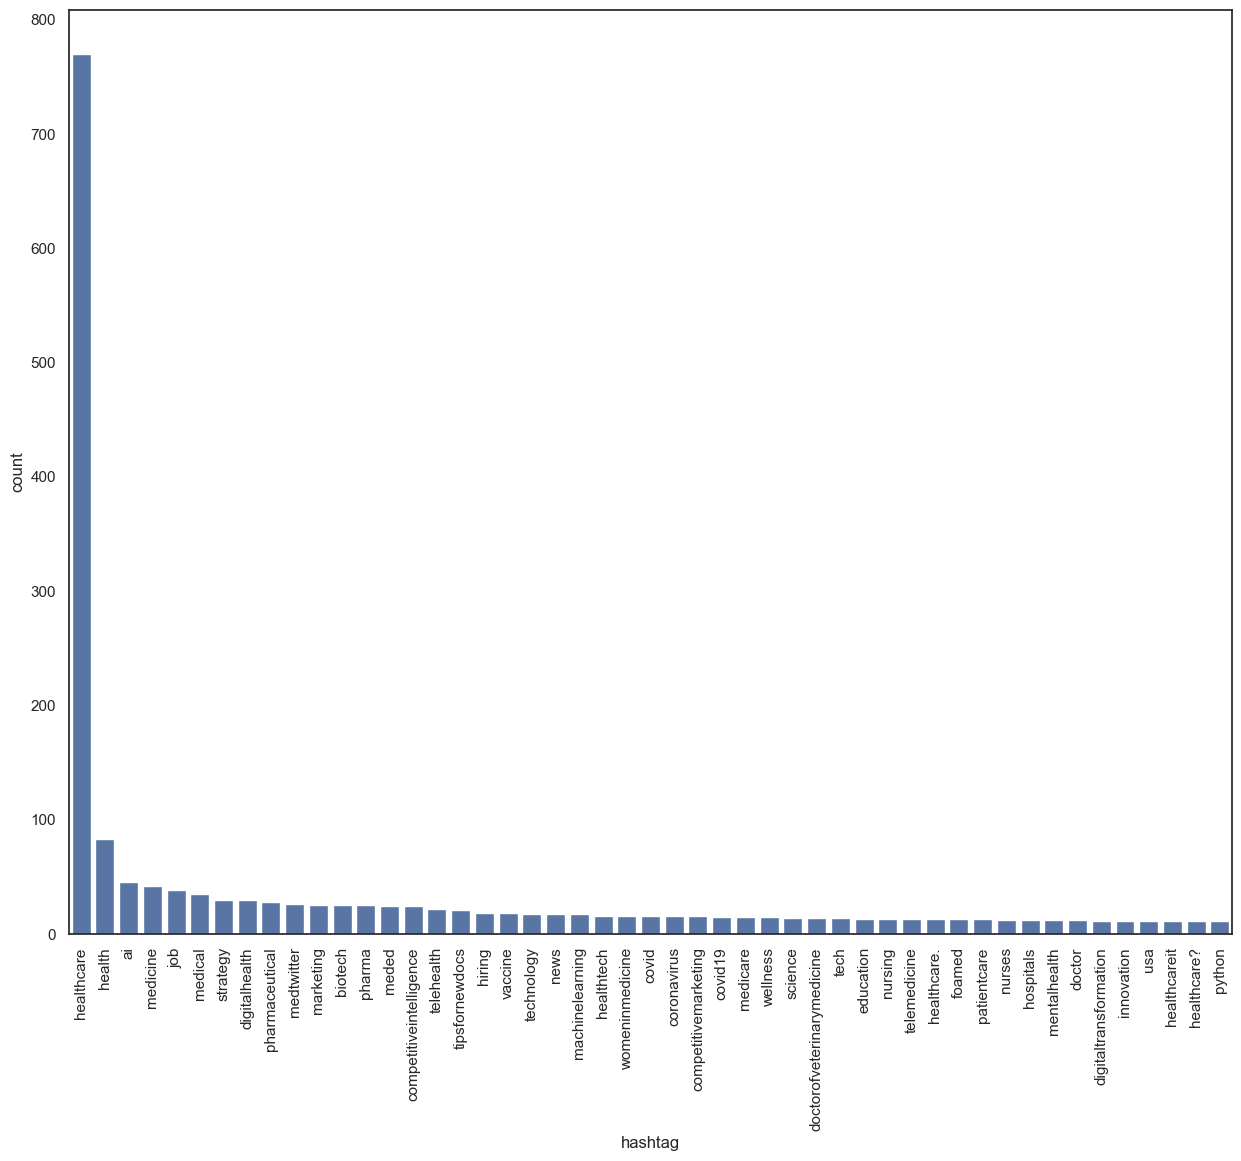

In [451]:
# Create an initial Seaborn barplot indicating records with a count >10 records.
axes=sns.barplot(data=tag_df_subset,x="hashtag",y="count")

#Rotate x axis labels for readability
axes=axes.set_xticklabels(axes.get_xticklabels(),rotation=90)


We can see that "healthcare" is by far the most common tag with over 700 instances, so we will exclude that and replot so that we can get a more informed view of the other tags.  To make things clearer we will re-orient the chart and highlight the 5 most common tags.

In [453]:
#Remove "healthcare"
tag_df_subset=tag_df_subset[tag_df_subset["hashtag"]!="healthcare"]

#Get the 5 largest hashtags by count so we can highlight the top 5
five_largest=tag_df_subset.nlargest(5,"count")["hashtag"].to_list()
five_largest

['health', 'ai', 'medicine', 'job', 'medical']

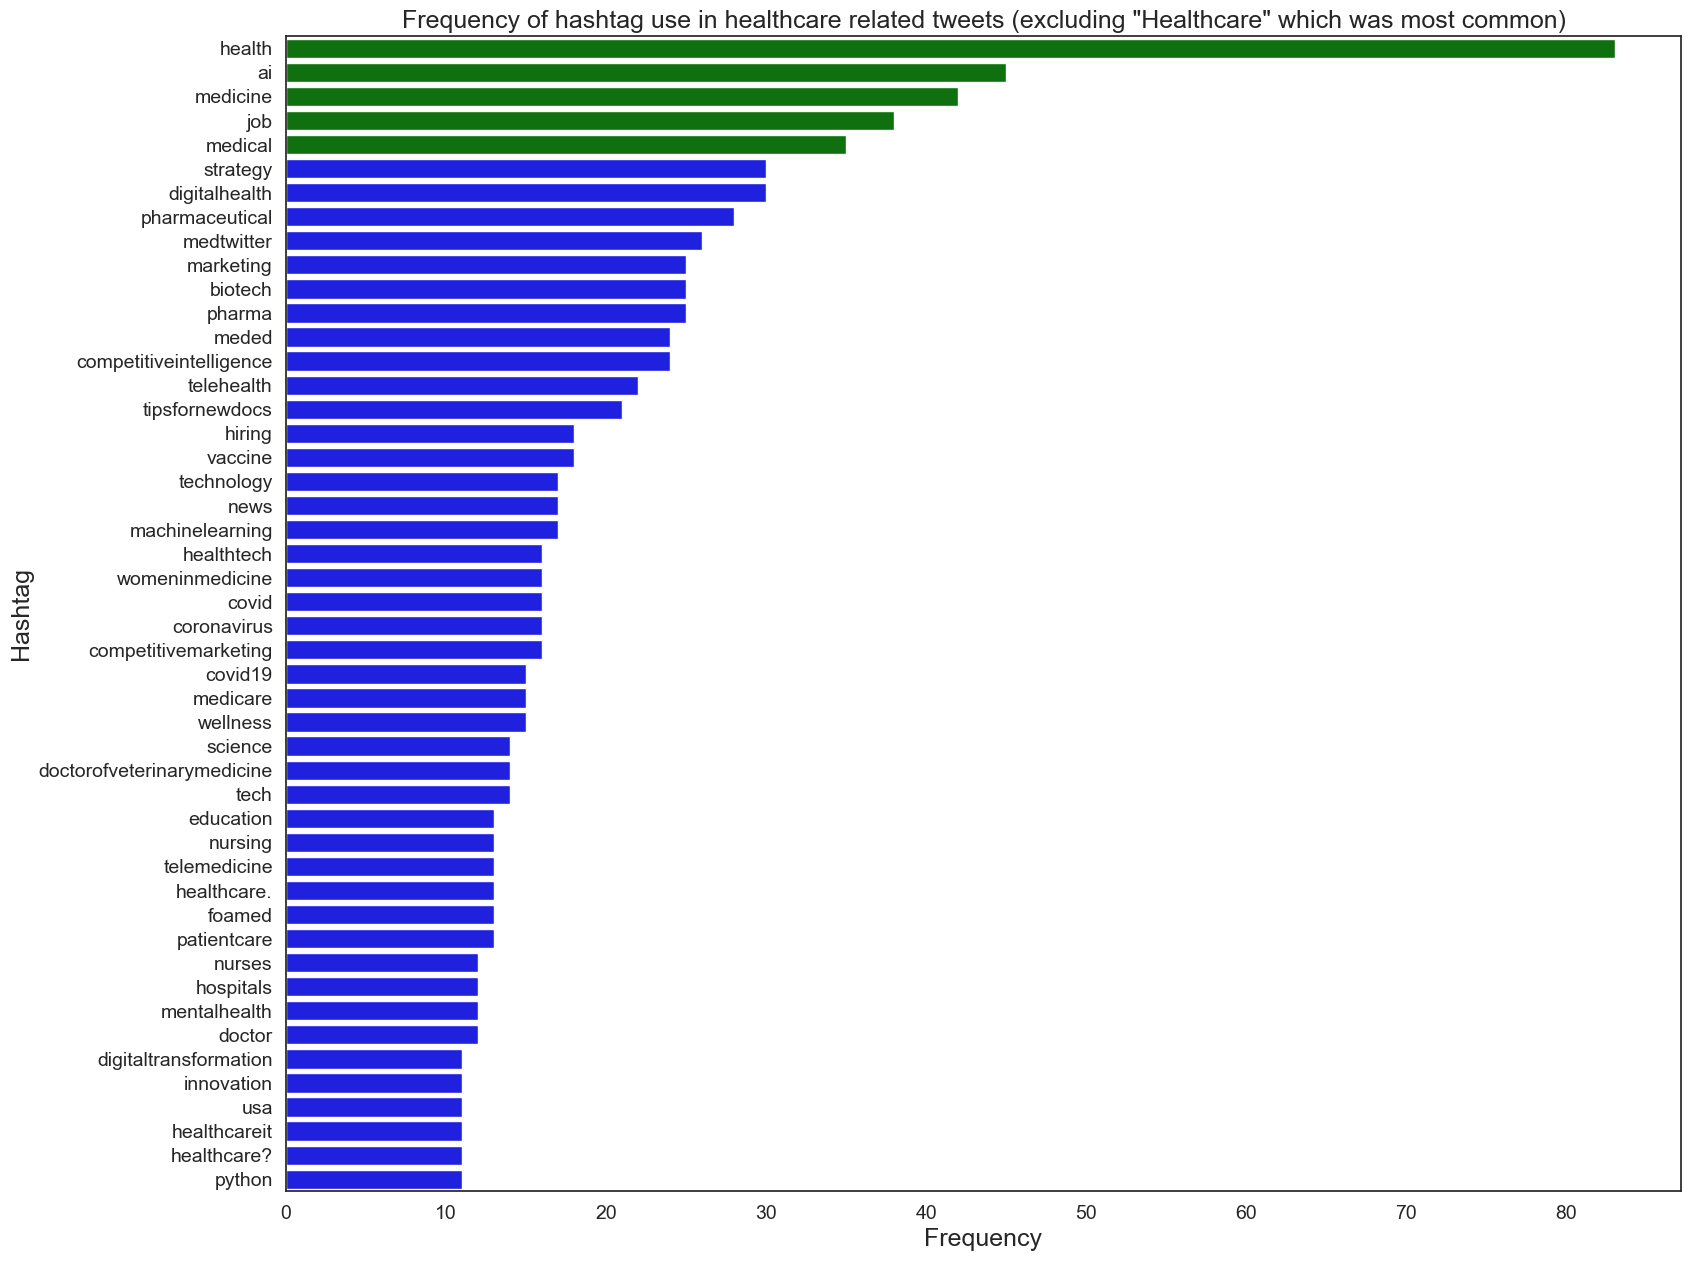

In [454]:
#produce a custom list of colours - red if the hashtag is one of the 5 largest and blue otherwise
colors = ['green' if hashtag in five_largest else 'blue' for hashtag in tag_df_subset["hashtag"].to_list()]

# Set figure size a little larger
sns.set(rc={'figure.figsize':(18, 15)})
# Ensure that the plot style is still white.
sns.set_style('white')

#Plot hashtags on the y axis for clarity, using our custom colours as a palette
axes=sns.barplot(data=tag_df_subset,y="hashtag",x="count",palette=colors)

#Label axes meaningfully
axes.set_xlabel("Frequency",fontsize=18)
axes.set_ylabel('Hashtag', fontsize=18)
axes.set_title('Frequency of hashtag use in healthcare related tweets (excluding "Healthcare" which was most common)', fontsize=18)
axes.tick_params(axis='both', which='major', labelsize=14)

#Export
axes.get_figure().savefig("tweets.png")

# 

### Make recommendations to the NHS. 

In [457]:
# Show the minimum and maximum dates covered by the regional data (AR)
print(f"Appointment month in regional appointments file covers range {ar['appointment_month'].min().strftime('%B %Y')} to "
      f"{ar['appointment_month'].max().strftime('%B %Y')}")

Appointment month in regional appointments file covers range January 2020 to June 2022


In [458]:
# Filter the data set to only look at data from 2021-08 onwards.
aug_2021=datetime.strptime('2021-08-01','%Y-%m-%d')
ar_subset=ar[ar['appointment_month']>=aug_2021]

#Verify this is correct
print(ar_subset['appointment_month'].min().strftime('%B %Y'))
print(ar_subset['appointment_month'].max().strftime('%B %Y'))

August 2021
June 2022


**Question 1:** How does the utilisation vary by month compared to the planned capacity?  Does any evidence emerge for appointments being above or below planned capacity? We will examine the number of appointments against planned capacity for Aug 2021 to Jun 2022 and examine alternatives to simple division by 30 to calculate the monthly utilisation.

In [460]:
# Create an aggregated version of ar grouping by all levels
ar_agg=ar_subset.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment'])\
                ['count_of_appointments'].sum()

#Reset index so groups repeat on each row
ar_agg=ar_agg.reset_index()
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06-01,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [461]:
# Create another dataframe to aggregate and sum appointments my month
ar_df=ar_subset.groupby("appointment_month")["count_of_appointments"].sum()
ar_df=ar_df.reset_index()
ar_df

,appointment_month,count_of_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776
5,2022-01-01,25635474
6,2022-02-01,25355260
7,2022-03-01,29595038
8,2022-04-01,23913060
9,2022-05-01,27495508


In [462]:
#To assist with utilisation, define two functions so we can compare calculating utilisation assuming 1.2 million per day and 
#1.2 million per business day

#We will calculate the number of days in the month rather than dividing by 30 as it will be more accurate

#Given a date representing the first of a month, return the number of days in the month
def daysInMonth(monthDate):
    #Find the start of the next month
    nextMonth=monthDate + relativedelta(months=+1)
    #Subtract one day to get the end date of the last month
    monthEnd=nextMonth + relativedelta(days=-1)

    delta=monthEnd-monthDate

    #Add one to the difference as "days between" 1st and 31st will be 30
    days=delta.days+1 
    return days

#Given a date representing the first of a month, return the number of weekdays in the month
def weekdaysInMonth(monthDate):
    #Find the start of the next month
    nextMonth=monthDate + relativedelta(months=+1)
    #Subtract one day to get the end date of the last month
    monthEnd=nextMonth + relativedelta(days=-1)

    days=np.busday_count(monthDate.date(),monthEnd.date())

    return days

#Test functions  
aug_2021=datetime.strptime('2021-08-01','%Y-%m-%d')
feb_2022=datetime.strptime('2022-02-01','%Y-%m-%d')

print(daysInMonth(aug_2021))
print(daysInMonth(feb_2022))

print(weekdaysInMonth(aug_2021))
print(weekdaysInMonth(feb_2022))

31
28
21
19


In [463]:
#Populate month days and month weekdays columns in the dataframe
ar_df["month_days"]=ar_df["appointment_month"].apply(daysInMonth)
ar_df["month_weekdays"]=ar_df["appointment_month"].apply(weekdaysInMonth)
ar_df

,appointment_month,count_of_appointments,month_days,month_weekdays
0,2021-08-01,23852171,31,21
1,2021-09-01,28522501,30,21
2,2021-10-01,30303834,31,21
3,2021-11-01,30405070,30,21
4,2021-12-01,25140776,31,22
5,2022-01-01,25635474,31,20
6,2022-02-01,25355260,28,19
7,2022-03-01,29595038,31,22
8,2022-04-01,23913060,30,21
9,2022-05-01,27495508,31,21


In [464]:
#Calculate utilisation using both days and weekdays, rounding to nearest whole number
ar_df["utilisation_per_day"]=round(ar_df["count_of_appointments"]/ar_df["month_days"])
ar_df["utilisation_per_weekday"]=round(ar_df["count_of_appointments"]/ar_df["month_weekdays"])
ar_df

,appointment_month,count_of_appointments,month_days,month_weekdays,utilisation_per_day,utilisation_per_weekday
0,2021-08-01,23852171,31,21,769425.0,1135818.0
1,2021-09-01,28522501,30,21,950750.0,1358214.0
2,2021-10-01,30303834,31,21,977543.0,1443040.0
3,2021-11-01,30405070,30,21,1013502.0,1447860.0
4,2021-12-01,25140776,31,22,810993.0,1142763.0
5,2022-01-01,25635474,31,20,826951.0,1281774.0
6,2022-02-01,25355260,28,19,905545.0,1334487.0
7,2022-03-01,29595038,31,22,954679.0,1345229.0
8,2022-04-01,23913060,30,21,797102.0,1138717.0
9,2022-05-01,27495508,31,21,886952.0,1309310.0


We will create a line chart to plot appointments per month to explore the seasonal variation.

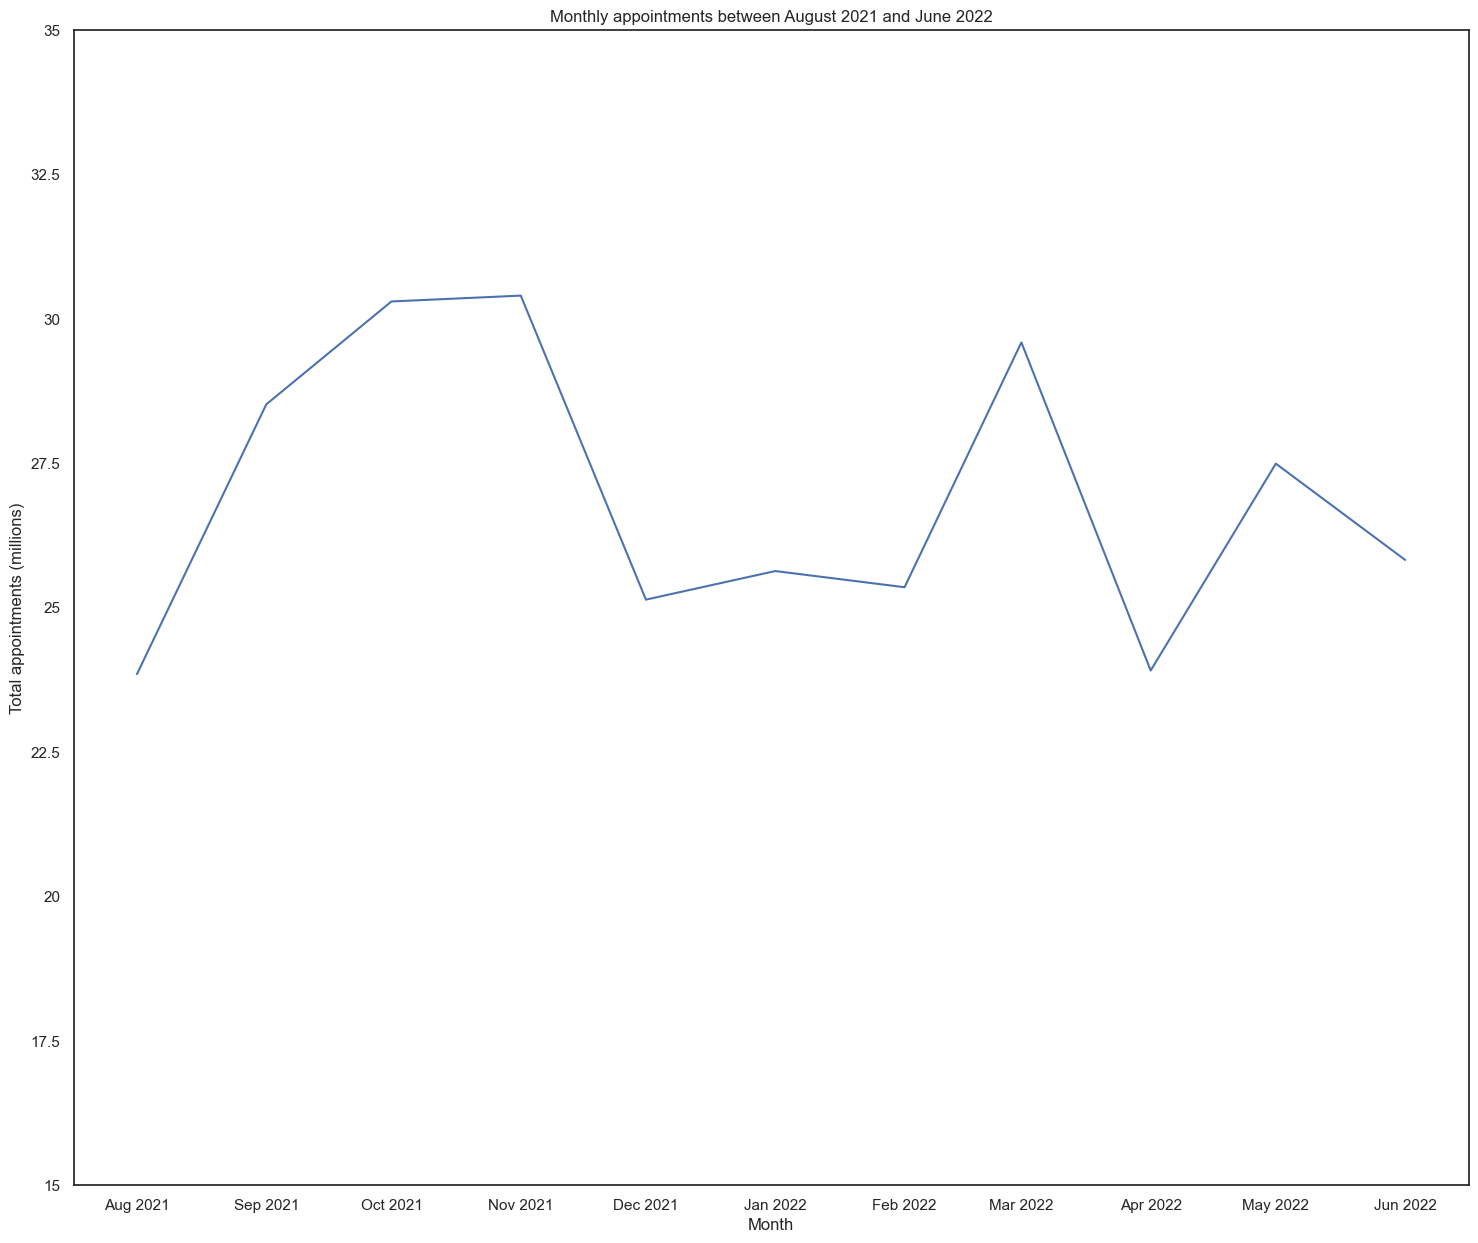

In [466]:
#Create a visualisation showing monthly appointments for the dataset
axes=sns.lineplot(data=ar_df,x="appointment_month",y="count_of_appointments")

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Set axis labels and chart titles
axes.set_xlabel("Month")
axes.set_ylabel('Total appointments (millions)')
axes.set_title("Monthly appointments between August 2021 and June 2022")

#Force y axis limits to 15 and 35 million for clarity
axes.set_ylim([15e6,35e6])

#Rescale y axis to use millions
formatInMillions(axes)

We see as before a peak in autumn and early spring.  
Now to explore utilisation we will produce a line plot of utilisation for the same period, showing the planned capacity based on 1.2 million appointments per day as a horizontal line..

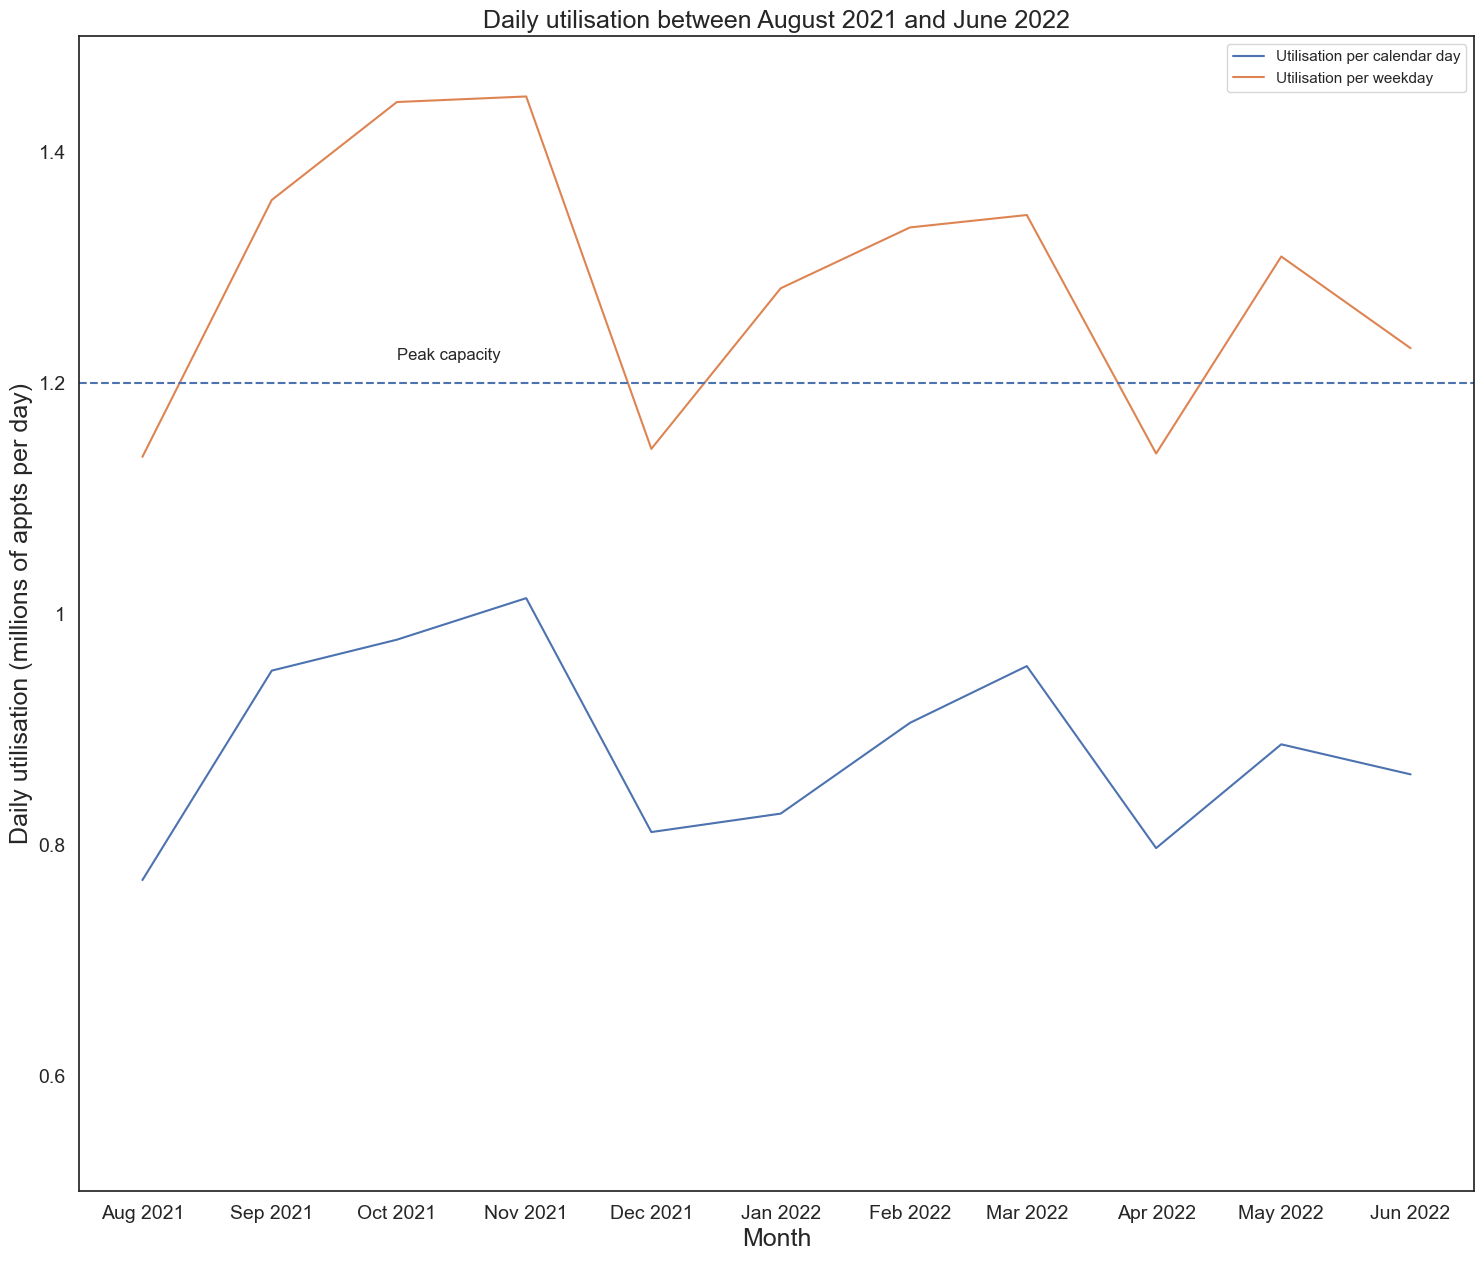

In [468]:
#Produce a visualisation showing utilisation per day and per weekday for the same period

axes=sns.lineplot(data=ar_df,x="appointment_month",y="utilisation_per_day",label="Utilisation per calendar day")
axes=sns.lineplot(data=ar_df,x="appointment_month",y="utilisation_per_weekday",label="Utilisation per weekday")

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Set axis labels and chart titles
axes.set_xlabel("Month",fontsize=18)
axes.set_ylabel('Daily utilisation (millions of appts per day)',fontsize=18)
axes.set_title("Daily utilisation between August 2021 and June 2022",fontsize=18)
axes.tick_params(axis='both', which='major', labelsize=14)

#Force y axis limits to 0.5 and 1.5 million for clarity
axes.set_ylim([0.5e6,1.5e6])

#Rescale y axis to use millions
formatInMillions(axes)

#Draw a horizontal dashed line at 1.2 million (peak capacity)
axes.axhline(1.2e6, linestyle='--')

#Position label at October 2021 and slightly above the line
labelDate=datetime.strptime("2021-10-01","%Y-%m-%d")
axes=axes.text(labelDate,1.22e6,"Peak capacity")

axes.get_figure().savefig("monthlyutilisation.png")

If we assume a capacity of 1.2 million per calendar day, then this visualisation shows that during Aug 2021 to Jun 2022, peak capacity was not exceeded. **However** if we assume 1.2 per weekday, then peak capacity is exceeded almost every month.
We need to investigate whether the proportion of actual appointments booked at the weekend supports using weekdays only.

In [470]:
# Add a column to the ad (actual appointments) dataset showing the day name of the appointment_date
ad["appointment_day_name"]=ad["appointment_date"].dt.day_name()
ad["appointment_day_name"].unique()

totalAppointments=ad["count_of_appointments"].sum()
print(f"There are {totalAppointments} actual appointments")

ad_weekends=ad[ad["appointment_day_name"].isin(["Saturday","Sunday"])]
#Test days included correct
print(ad_weekends["appointment_day_name"].unique())

weekendAppointments=ad_weekends["count_of_appointments"].sum()
print(f"There were {weekendAppointments} weekend appointments")

#Calculate the percentage of weekend appointments
percentageWeekend=round((weekendAppointments/totalAppointments)*100.00,2)
print(f"{percentageWeekend}% of appointments took place at the weekend")

There are 167980692 actual appointments
['Saturday' 'Sunday']
There were 1097342 weekend appointments
0.65% of appointments took place at the weekend


The fact that only 0.65% of appointments took place supports the use of weekdays as opposed to calendar days when calculating utilisation.

**Question 2:** How does the number of appointments change over time for each healthcare professional (hcp) type?  Plotting each appointments against month for each hcp type in a different colour on a line chart should illustrate this.

In [473]:
#Group the data by hcp type and month and sum appointments, resetting index so that the values are repeated for each record
ar_hcp=ar_subset.groupby(["appointment_month","hcp_type"])["count_of_appointments"].sum().reset_index()
ar_hcp.head()

,appointment_month,hcp_type,count_of_appointments
0,2021-08-01,GP,12299022
1,2021-08-01,Other Practice staff,10797821
2,2021-08-01,Unknown,755328
3,2021-09-01,GP,14487785
4,2021-09-01,Other Practice staff,13126731


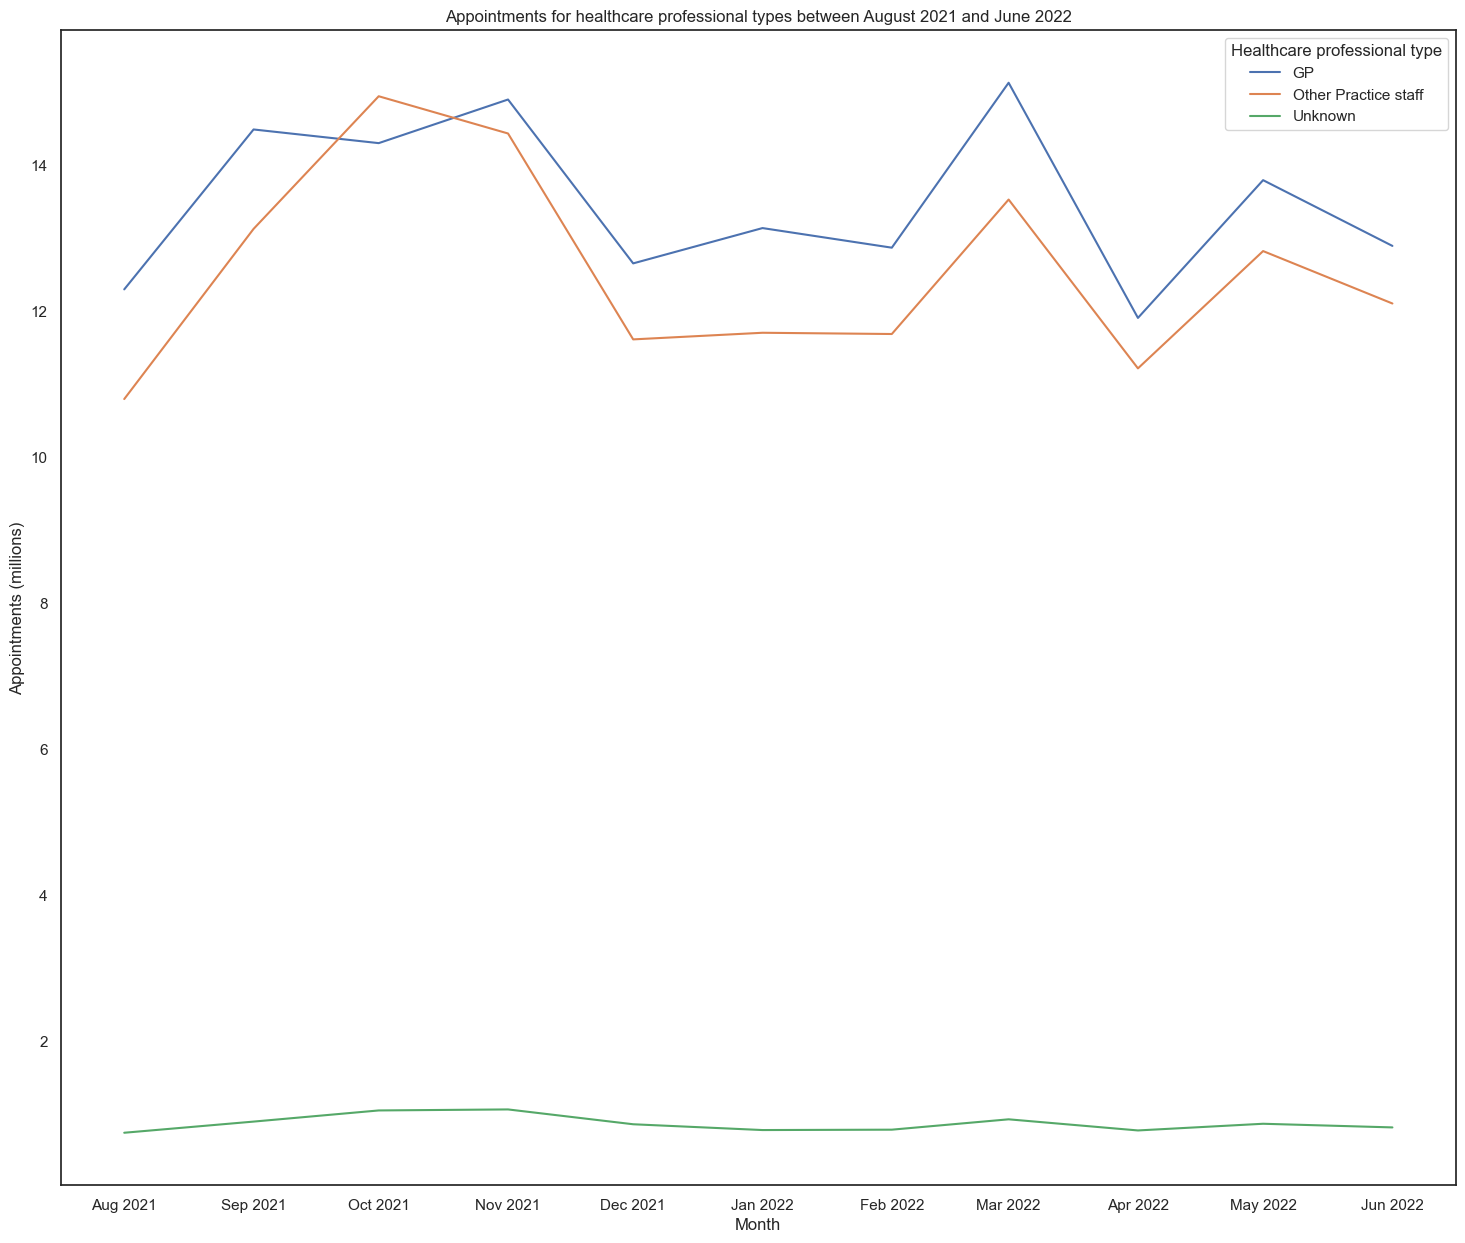

In [474]:
#Plot the data, using hcp_type as the line color
axes=sns.lineplot(data=ar_hcp,x="appointment_month",y="count_of_appointments",hue="hcp_type")

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Rescale y axis to use millions
formatInMillions(axes)

#Set axis labels and chart titles
axes.set_xlabel("Month")
axes.set_ylabel('Appointments (millions)')
axes.set_title("Appointments for healthcare professional types between August 2021 and June 2022")
axes.legend(title="Healthcare professional type")

We see similar peaks in Autumn and Spring for both GP's and other practice staff.  The "Unknown" category has slight peaks at these times but there are far fewer appointments for this category.

**Question 3:** How does the number of missed appointments for each mode change over time?.  We will calculate the percentage of "DNA" status appointments, removing "Unknowns" as we can't assume these are either attended or unattended.

In [477]:
# Remove "unknown" as we cannot know whether the appointment was attended or not
ar_apt_status=ar_subset[ar_subset["appointment_status"].str.lower()!="unknown"]

#Group by appointment month, mode and appointment status
ar_apt_group=ar_apt_status.groupby(["appointment_month","appointment_mode","appointment_status"])["count_of_appointments"].sum()
ar_apt_group=ar_apt_group.reset_index()
ar_apt_group
#Pivot so that we have the appointment statuses as columns
ar_apt_group=ar_apt_group.pivot(index=["appointment_month","appointment_mode"],columns=["appointment_status"],values="count_of_appointments")
ar_apt_group.head()

appointment_status                  Attended     DNA
appointment_month appointment_mode                  
2021-08-01        Face-to-Face      12486211  726087
                  Home Visit          114731    6741
                  Telephone          8726555  185902
                  Unknown             652592   25188
                  Video/Online        101676    5219

In [478]:
#Calculate a percentage of DNA appointments
ar_apt_group["DNA_percentage"]=(ar_apt_group["DNA"]/(ar_apt_group["Attended"] + ar_apt_group["DNA"]))*100
ar_apt_group

appointment_status                  Attended      DNA  DNA_percentage
appointment_month appointment_mode                                   
2021-08-01        Face-to-Face      12486211   726087        5.495539
                  Home Visit          114731     6741        5.549427
                  Telephone          8726555   185902        2.085867
                  Unknown             652592    25188        3.716250
                  Video/Online        101676     5219        4.882361
2021-09-01        Face-to-Face      15147988  1066945        6.580015
                  Home Visit          128405     7758        5.697583
                  Telephone          9578824   206589        2.111193
                  Unknown             763763    32124        4.036251
                  Video/Online        138086     7932        5.432207
2021-10-01        Face-to-Face      16989864  1314476        7.181226
                  Home Visit          133740     7796        5.508139
                  Telephone          8981204   191559        2.088346
                  Unknown             908552    42796        4.498459
                  Video/Online        157146     8997        5.415215
2021-11-01        Face-to-Face      16959008  1168648        6.446768
                  Home Visit          151771     8965        5.577469
                  Telephone          9503587   202403        2.085341
                  Unknown             906548    39417        4.166856
                  Video/Online        146751     8654        5.568675
2021-12-01        Face-to-Face      13603930   973934        6.680910
                  Home Visit          133729     8518        5.988175
                  Telephone          8294229   176733        2.086339
                  Unknown             707058    32463        4.389733
                  Video/Online        114537     7218        5.928299
2022-01-01        Face-to-Face      13928856   853515        5.773871
                  Home Visit          129407     7597        5.545094
                  Telephone          8782610   183167        2.042957
                  Unknown             635475    25188        3.812534
                  Video/Online        120848     6546        5.138390
2022-02-01        Face-to-Face      14066370   859758        5.760087
                  Home Visit          130893     6261        4.564942
                  Telephone          8397483   181415        2.114666
                  Unknown             638809    23030        3.479698
                  Video/Online        118384     6194        4.971985
2022-03-01        Face-to-Face      16546081  1035975        5.892229
                  Home Visit          155129     6598        4.079715
                  Telephone          9586849   213908        2.182566
                  Unknown             741031    26156        3.409338
                  Video/Online        140912     7251        4.893934
2022-04-01        Face-to-Face      13594930   843333        5.840959
                  Home Visit          134142     5418        3.882201
                  Telephone          7496265   170654        2.225848
                  Unknown             605965    20010        3.196613
                  Video/Online        117512     6040        4.888630
2022-05-01        Face-to-Face      16036543   970268        5.705173
                  Home Visit          155834     6806        4.184702
                  Telephone          8355795   195201        2.282787
                  Unknown             662076    20374        2.985420
                  Video/Online        133693     6869        4.886812
2022-06-01        Face-to-Face      15164720   949083        5.889876
                  Home Visit          146648     6018        3.941939
                  Telephone          7659958   187053        2.383748
                  Unknown             617426    19028        2.989690
                  Video/Online        126565     6608        4.961967

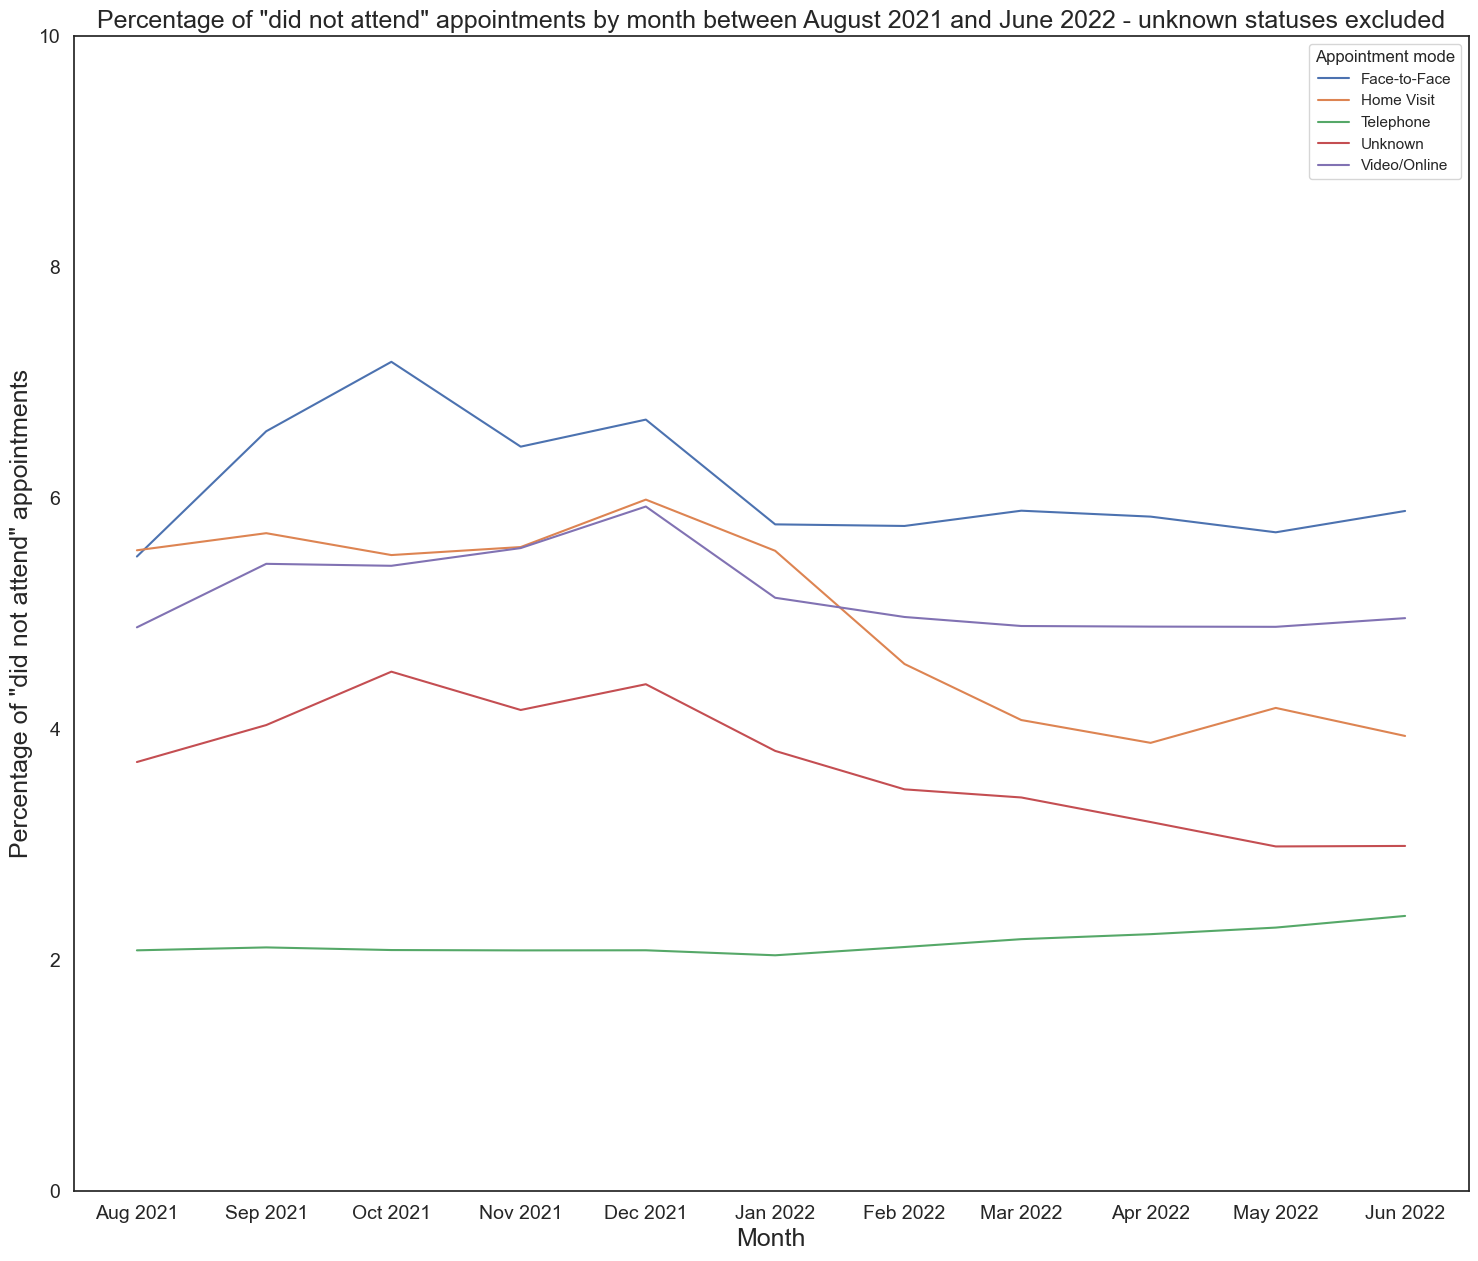

In [479]:
#Produce a lineplot to show the changes, using a different coloured line for each appointment mode
axes=sns.lineplot(data=ar_apt_group,x="appointment_month",y="DNA_percentage",hue="appointment_mode")

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Set axis labels and chart titles
axes.set_xlabel("Month", fontsize=18)
axes.set_ylabel('Percentage of "did not attend" appointments',fontsize=18)
axes.set_title('Percentage of "did not attend" appointments by month between August 2021 and June 2022 - unknown statuses excluded',fontsize=18)
axes.legend(title="Appointment mode")
axes.tick_params(axis='both', which='major', labelsize=14)

#Force y axis limits to 0 and 10 for clarity
axes.set_ylim([0,10])

#Export as PNG
axes.get_figure().savefig("dna_percentage.png")

We can see that telephone appointment DNA's had very little variation. However other modes had a peak in DNA's as a percentage in autumn, with face-to-face having the most pronounced peak with an increase from around 5.5% to 7%.

**Question 4:** Are there changes in terms of appointment type and the busiest months?  Plot appointments for each month with a separate line for each appointment type.

In [482]:
# Create a dataframe grouped on appointment month and mode
ar_apt_mode=ar_subset.groupby(["appointment_month","appointment_mode"])["count_of_appointments"].sum().reset_index()
ar_apt_mode.head()

,appointment_month,appointment_mode,count_of_appointments
0,2021-08-01,Face-to-Face,13717325
1,2021-08-01,Home Visit,151619
2,2021-08-01,Telephone,9149072
3,2021-08-01,Unknown,724126
4,2021-08-01,Video/Online,110029


In [483]:
#Create 2 dataframes so that face-to-face/telephone can be plotted separately to other modes
ar_apt_f2f_phone=ar_apt_mode[ar_apt_mode["appointment_mode"].isin(["Face-to-Face","Telephone"])]
ar_apt_f2f_phone.head()

,appointment_month,appointment_mode,count_of_appointments
0,2021-08-01,Face-to-Face,13717325
2,2021-08-01,Telephone,9149072
5,2021-09-01,Face-to-Face,17266602
7,2021-09-01,Telephone,10068770
10,2021-10-01,Face-to-Face,19471561


In [484]:
#Same process for the other modes
ar_apt_others=ar_apt_mode[~ar_apt_mode["appointment_mode"].isin(["Face-to-Face","Telephone"])]
ar_apt_others.head()

,appointment_month,appointment_mode,count_of_appointments
1,2021-08-01,Home Visit,151619
3,2021-08-01,Unknown,724126
4,2021-08-01,Video/Online,110029
6,2021-09-01,Home Visit,171829
8,2021-09-01,Unknown,859946


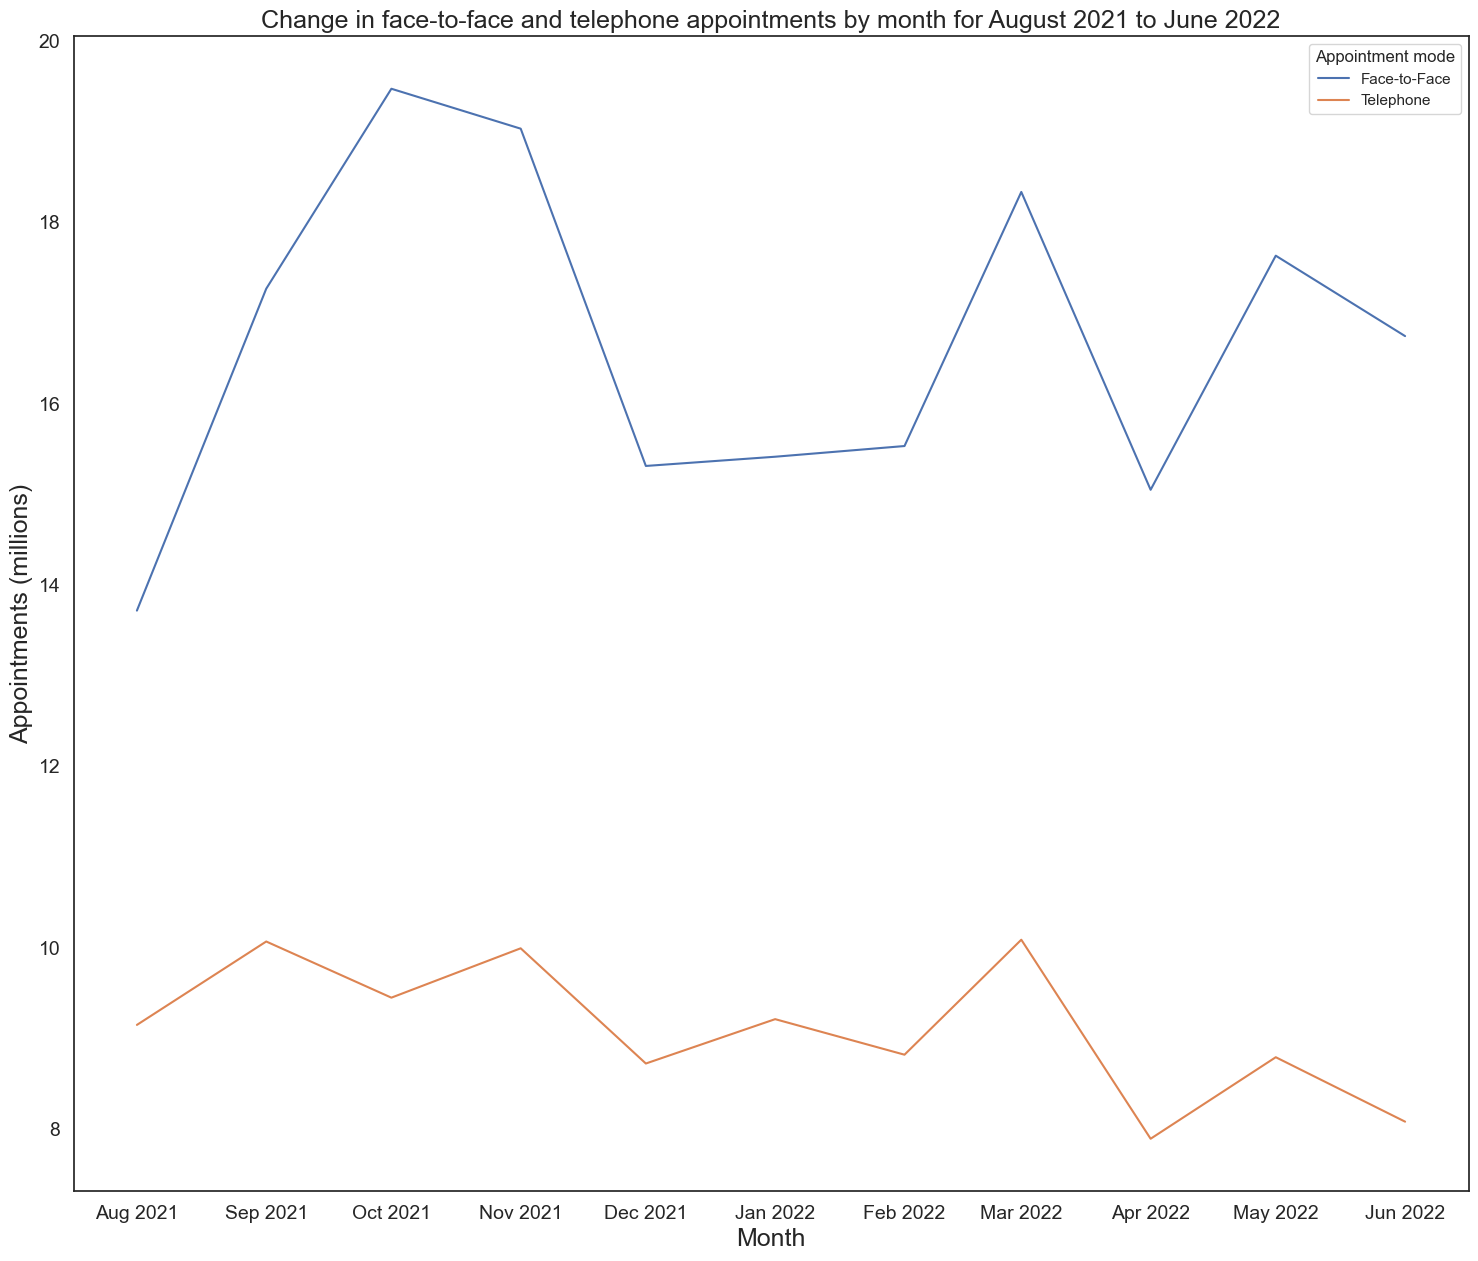

In [485]:
#Plot face-to-face/phone
axes=sns.lineplot(data=ar_apt_f2f_phone,x="appointment_month",y="count_of_appointments",hue="appointment_mode")

#Re-use the formatter to label the months nicely
axes.xaxis.set_major_formatter(monthFormatter)

#Set axis labels and chart titles
axes.set_xlabel("Month",fontsize=18)
axes.set_ylabel('Appointments (millions)',fontsize=18)
axes.set_title("Change in face-to-face and telephone appointments by month for August 2021 to June 2022",fontsize=18)
axes.legend(title="Appointment mode")
axes.tick_params(axis='both', which='major', labelsize=14)
#Rescale y axis to use millions
formatInMillions(axes)

#Export as PNG
axes.get_figure().savefig("f2f_phone_modes.png")

We again see a strong October/November peak in face-to-face appointments and a slightly lower March peak.  It is clear that there is no such Autumn peak
in phone appointments, although there is a Spring peak.

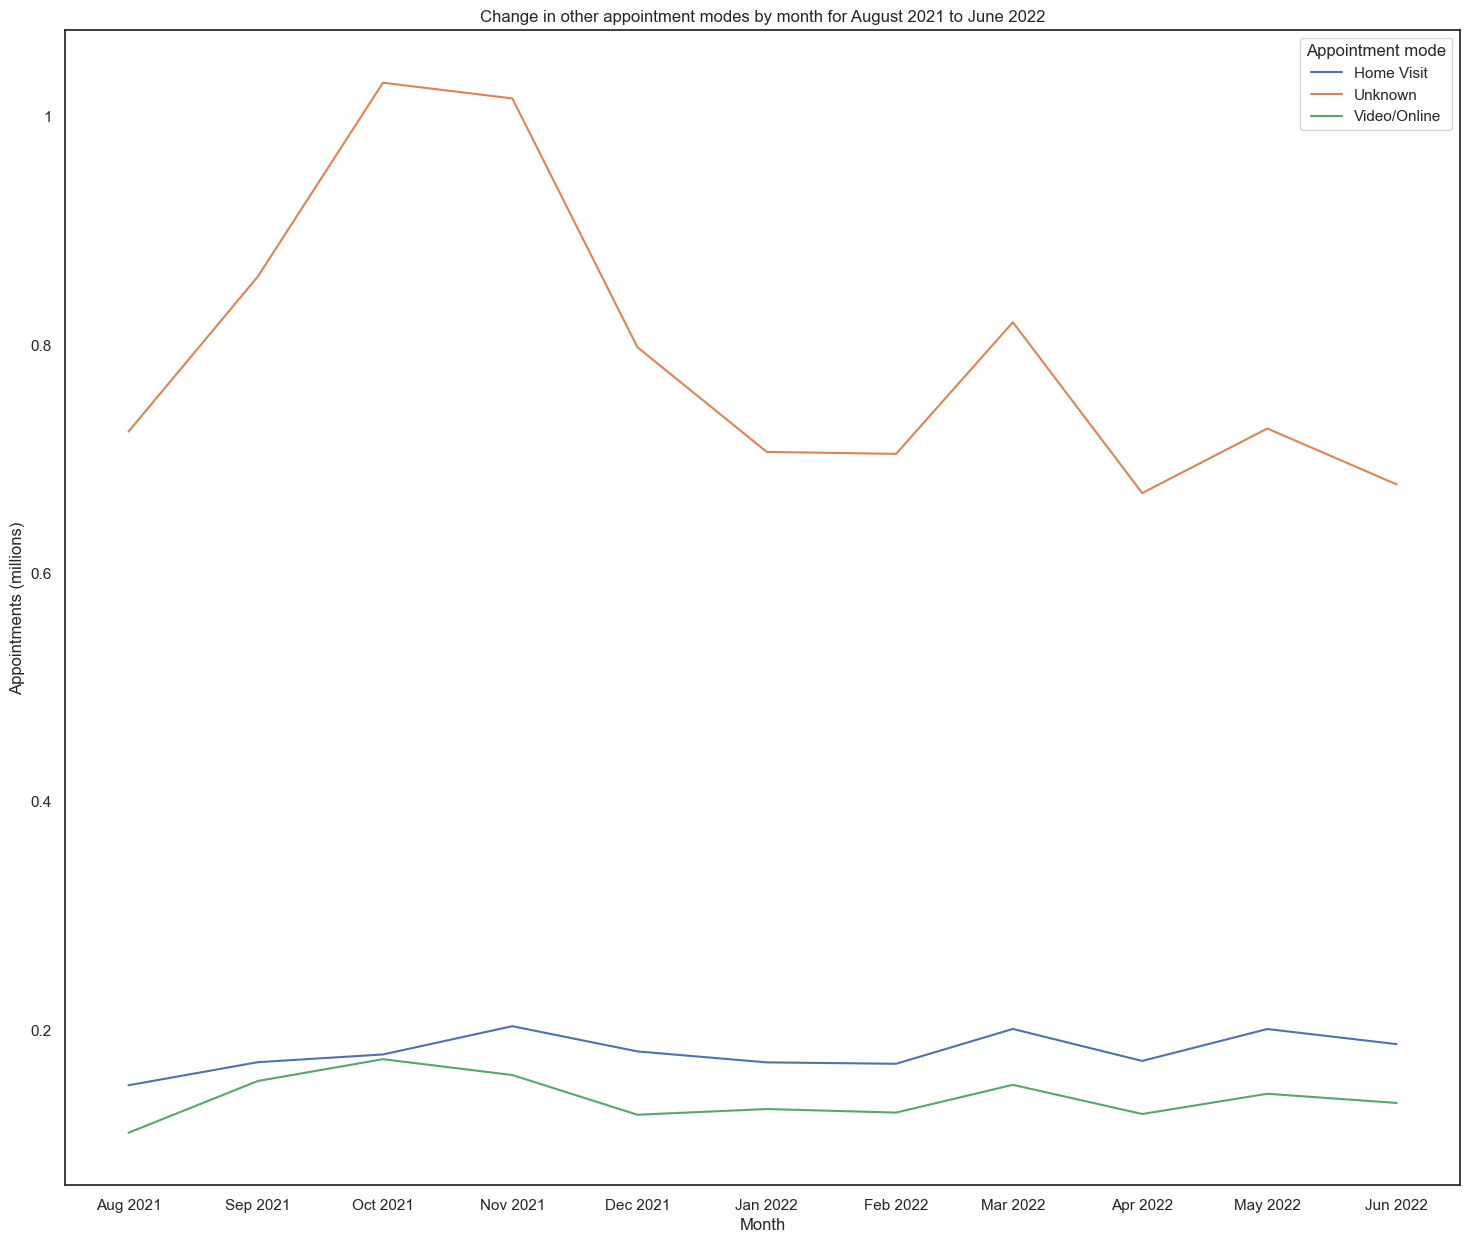

In [487]:
#Produce a similar plot for other modes using the same process

axes=sns.lineplot(data=ar_apt_others,x="appointment_month",y="count_of_appointments",hue="appointment_mode")

axes.xaxis.set_major_formatter(monthFormatter)

axes.set_xlabel("Month")
axes.set_ylabel('Appointments (millions)')
axes.set_title("Change in other appointment modes by month for August 2021 to June 2022")
axes.legend(title="Appointment mode")

formatInMillions(axes)

#Export as PNG
axes.get_figure().savefig("other_modes.png")

Only the "Unknown" mode shows any appreciable seasonal trend with a large peak in October/November and a smaller peak in March.  There is some seasonal variation in the other modes but it is much less pronounced.

**Question 5:** How does the number of appointments in different "time between booking" categories change over time?  We will plot appointments for each month with a separate line for each category. We will exclude "Unknown / Data Quality" records as we cannot interpret anything from them if they may have quality issues.

In [490]:
# Group subset by month and "time between book"
time_between_group=ar_subset.groupby(["appointment_month","time_between_book_and_appointment"])["count_of_appointments"].sum().reset_index()

#Remove groupings for unknown/DQ issues as including records with known quality issues is unhelpful
time_between_group=time_between_group[time_between_group["time_between_book_and_appointment"]!="Unknown / Data Quality"]
time_between_group

,appointment_month,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,1 Day,2018319
1,2021-08-01,15 to 21 Days,1453209
2,2021-08-01,2 to 7 Days,4924960
3,2021-08-01,22 to 28 Days,828866
4,2021-08-01,8 to 14 Days,2889150
...,...,...,...
82,2022-06-01,2 to 7 Days,4706718
83,2022-06-01,22 to 28 Days,1217197
84,2022-06-01,8 to 14 Days,3250347
85,2022-06-01,More than 28 Days,1067420


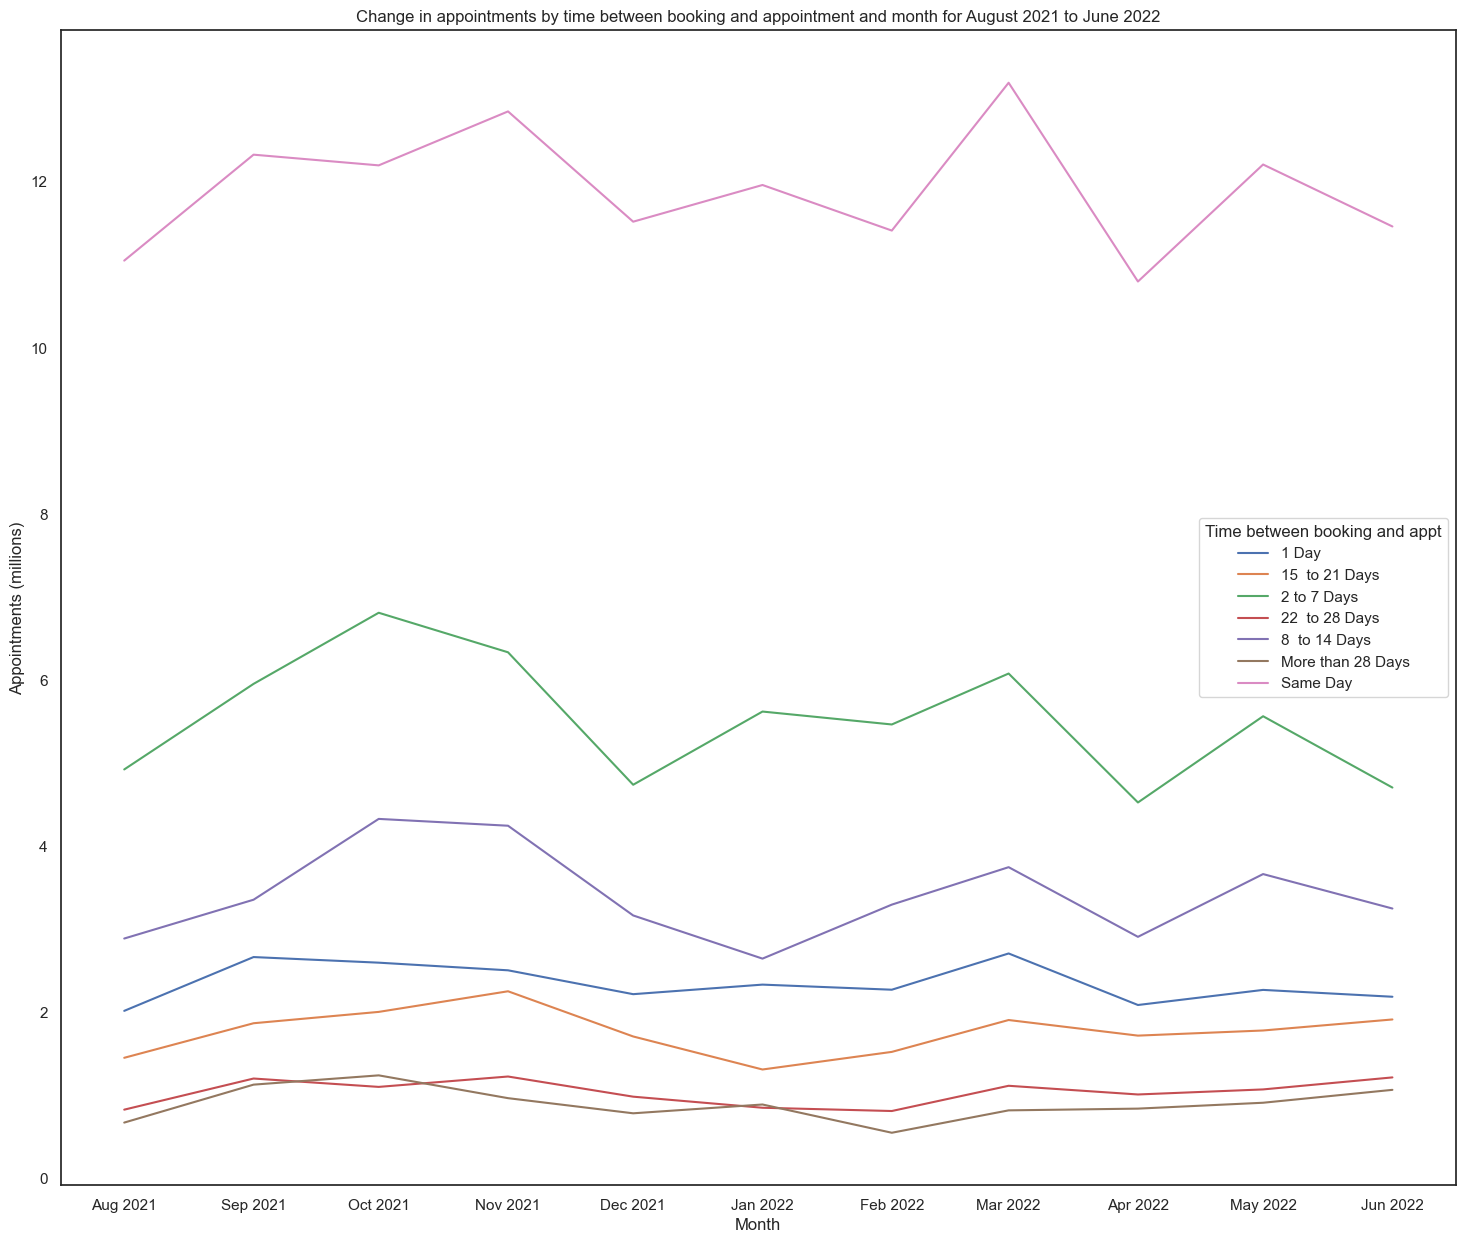

In [491]:
#Plot using a similar process
axes=sns.lineplot(data=time_between_group,x="appointment_month",y="count_of_appointments",hue="time_between_book_and_appointment")

axes.xaxis.set_major_formatter(monthFormatter)

axes.set_xlabel("Month")
axes.set_ylabel('Appointments (millions)')
axes.set_title("Change in appointments by time between booking and appointment and month for August 2021 to June 2022")
axes.legend(title="Time between booking and appt")

formatInMillions(axes)

#Export as PNG
axes.get_figure().savefig("time_between.png")

All groupings show a tendency toward Oct/Nov and March increases.  This trends is most pronounced in the same day, 2-7 days and 8-14 days categories.
It is worth noting that a clear majority of appointments happen within  a week of booking although this is perhaps unsurprising.

**Question 6:** How does the number of appointments vary for each service setting?  Explore this with boxplots.

In [494]:
#Group the nc dataframe by month and service setting for the same period
nc_apt_group=nc.groupby(["appointment_month_date","service_setting"])["count_of_appointments"].sum().reset_index()

#Filter this so we are examining the same period as previously
startDate=datetime.strptime('2021-08-01','%Y-%m-%d')
endDate=datetime.strptime('2022-06-01','%Y-%m-%d')
nc_apt_group=nc_apt_group[(nc_apt_group["appointment_month_date"]>=startDate) & (nc_apt_group["appointment_month_date"]<=endDate)]

print(nc_apt_group["appointment_month_date"].min())
print(nc_apt_group["appointment_month_date"].max())

nc_apt_group.head()

2021-08-01 00:00:00
2022-06-01 00:00:00


,appointment_month_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,160927
1,2021-08-01,General Practice,21575852
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843


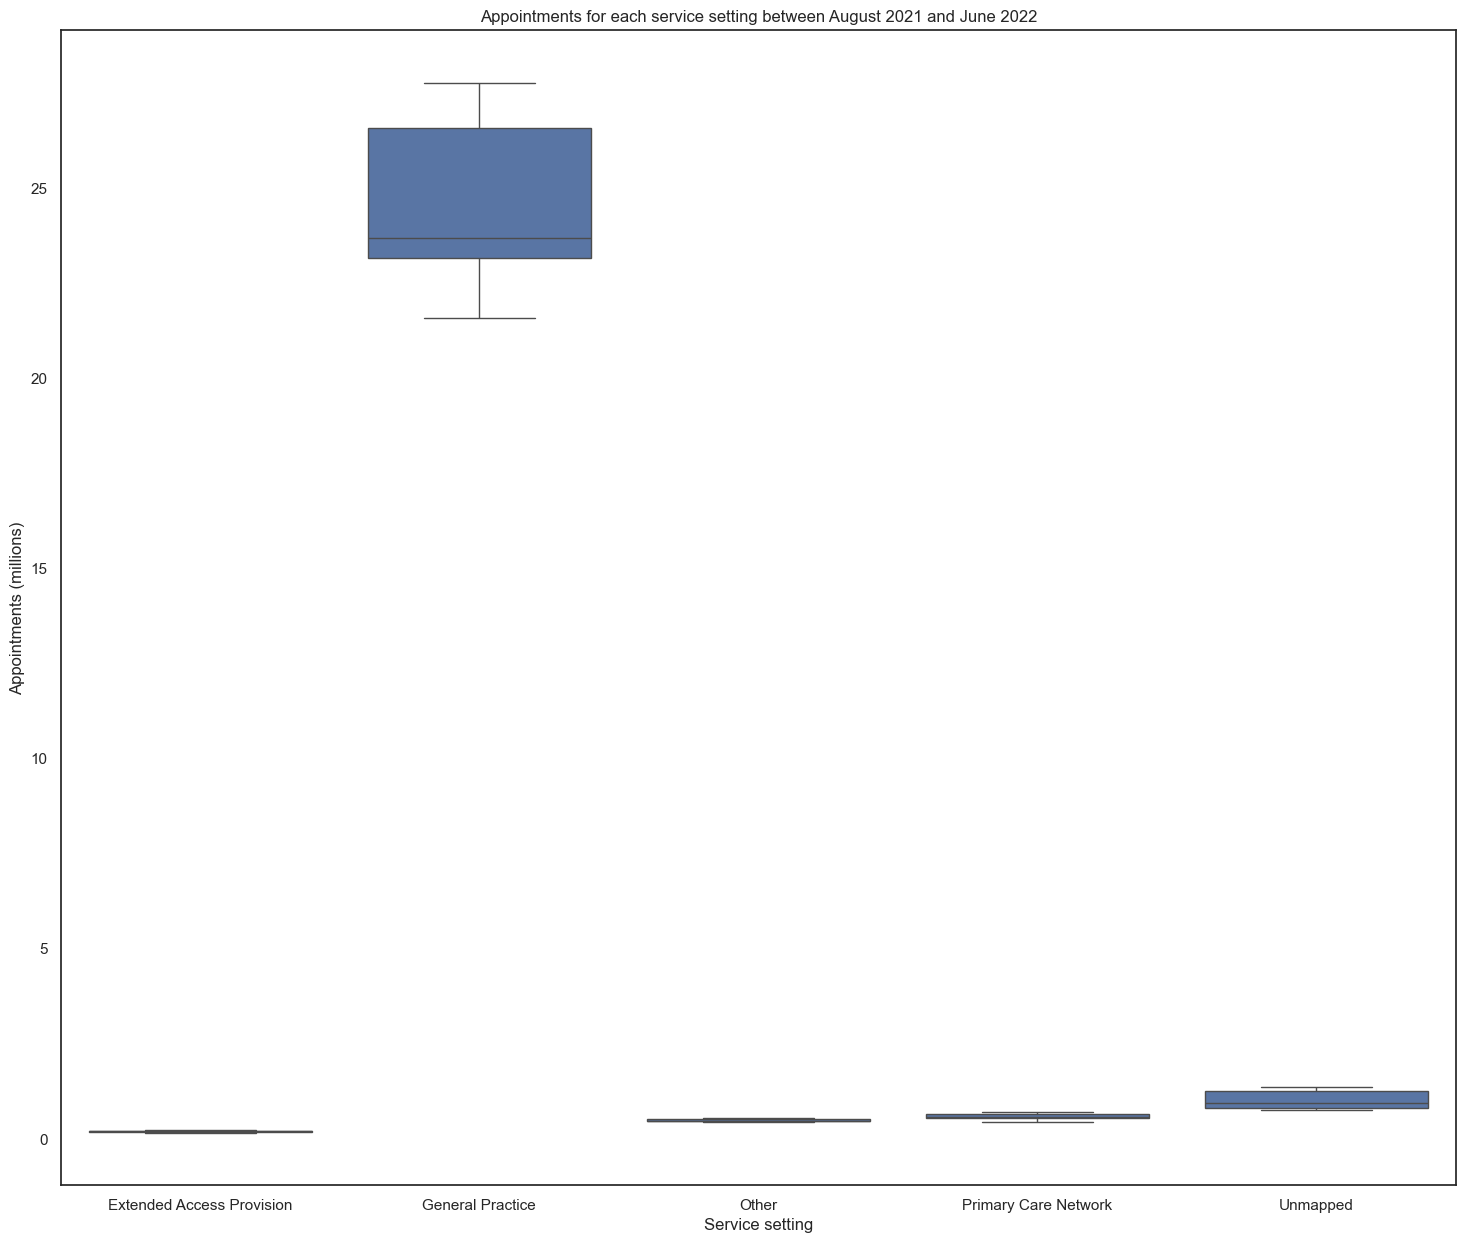

In [495]:
# Create a boxplot to explore how the appointments are distributed by service setting

axes=sns.boxplot(data=nc_apt_group,x="service_setting",y="count_of_appointments")
axes.set_xlabel("Service setting")
axes.set_ylabel("Appointments (millions)")
axes.set_title("Appointments for each service setting between August 2021 and June 2022")

formatInMillions(axes)


This boxplot is of limited use except to tell us that most appointments were in the general practice setting.

In [497]:
#Create a subset dataframe containing all service settings except General Practice
nc_apt_group_nogp=nc_apt_group[nc_apt_group["service_setting"]!="General Practice"]
nc_apt_group_nogp["service_setting"].unique()

array(['Extended Access Provision', 'Other', 'Primary Care Network',
       'Unmapped'], dtype=object)

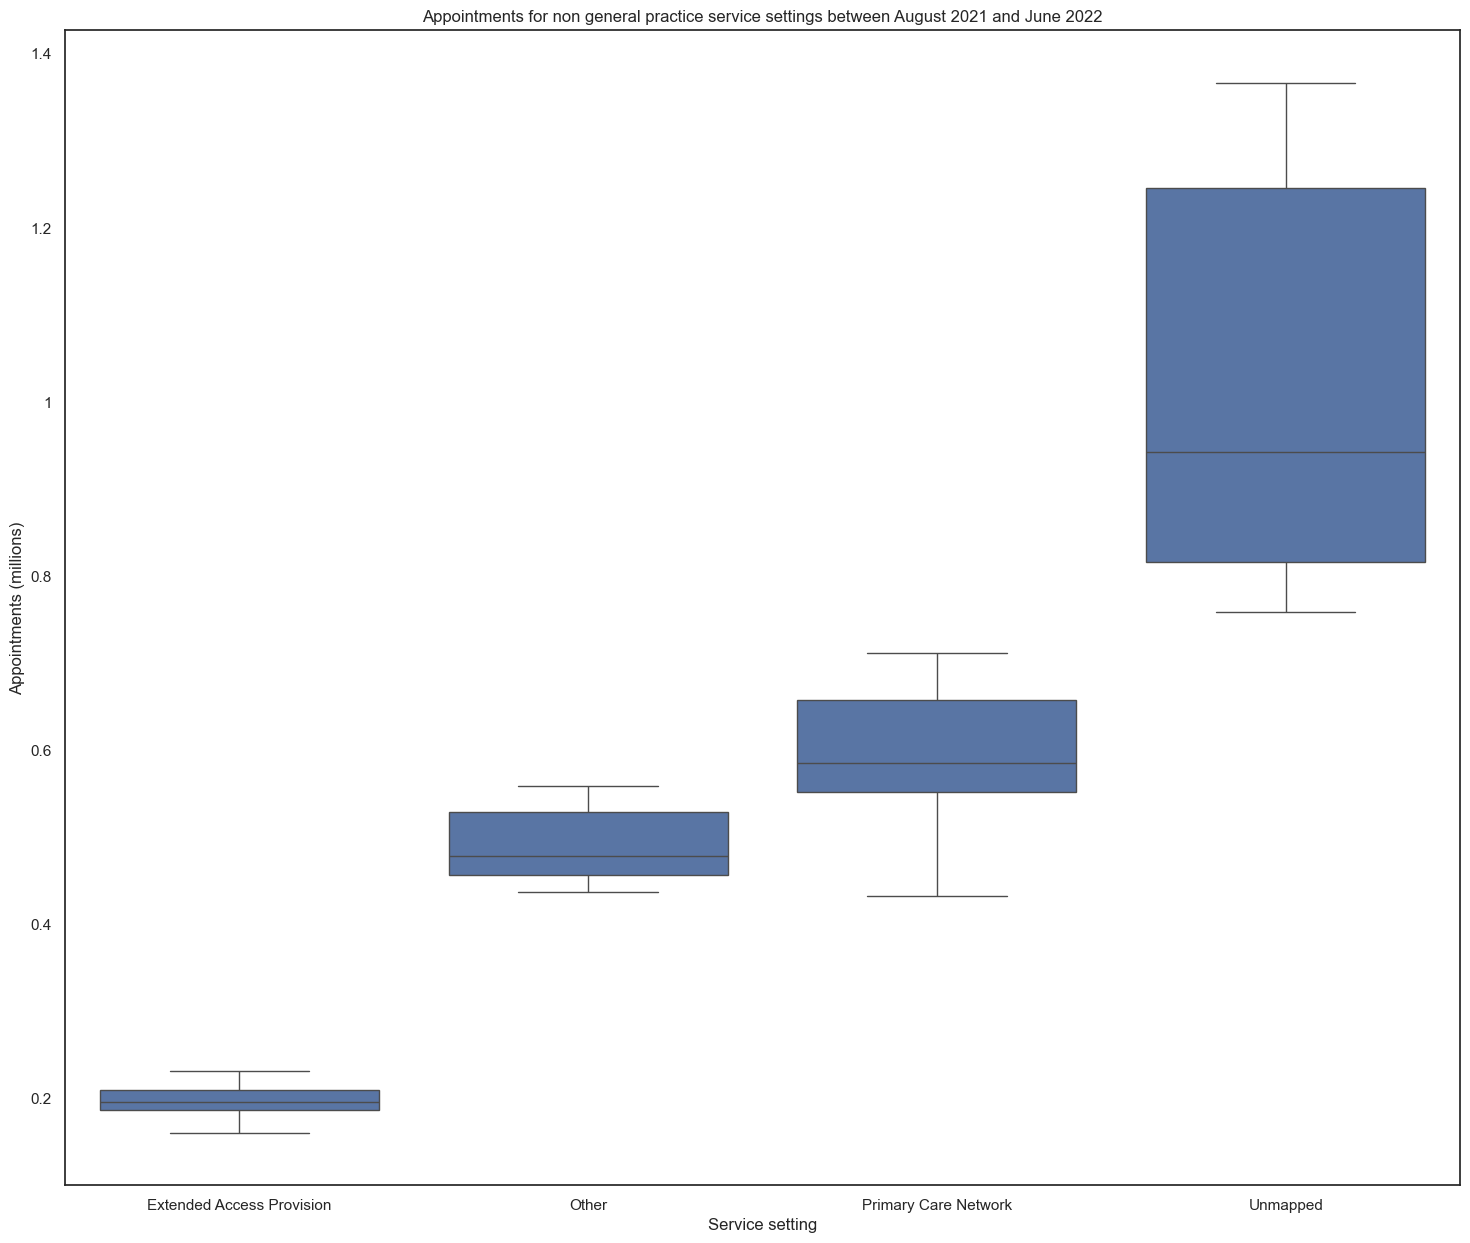

In [498]:
#Create a boxplot based on this data
axes=sns.boxplot(data=nc_apt_group_nogp,x="service_setting",y="count_of_appointments")

axes.set_xlabel("Service setting")
axes.set_ylabel("Appointments (millions)")
axes.set_title("Appointments for non general practice service settings between August 2021 and June 2022")

formatInMillions(axes)

We see that unmapped is the most common service setting after "General Practice".  

**Question 7**: What does the number of missed appointments for the busiest month look like compared to the percentage across the whole period?

In [501]:
# Calculate total appointments in November 2021
nov2021Date=datetime.strptime('2021-11-01',"%Y-%m-%d")

#Unknown appointment status is already excluded from ar_apt_status
#Subset to nov2021 only
nov_2021_subset=ar_apt_status[ar_apt_status["appointment_month"]==nov2021Date]

nov2021Appts=nov_2021_subset["count_of_appointments"].sum()

print(f"There were {nov2021Appts} appointments in November 2021 (excluding unknown statuses)")

nov2021_DNA=nov_2021_subset[nov_2021_subset["appointment_status"]=="DNA"]
dnaSum=nov2021_DNA["count_of_appointments"].sum()

print(f"There were {dnaSum} DNA appointments in November 2021")

dnaPercentage=round((dnaSum/nov2021Appts)*100,2)
print(f"This means of {dnaPercentage}% appointments were missed in November 2021")

#Calculate missed appointments overall for the Aug 2021 to Jun 2022 time period

allAppts=ar_apt_status["count_of_appointments"].sum()
print(f"There were {allAppts} appointments between Aug 2021 and Jun 2022 excluding unknown statuses")

missedAppts=ar_apt_status[ar_apt_status["appointment_status"]=="DNA"]["count_of_appointments"].sum()
print(f"There were {missedAppts} appointments between Aug 2021 and Jun 2022")

dnaPercentageAll=round((missedAppts/allAppts)*100,2)
print(f"This means of {dnaPercentageAll}% appointments were missed between Aug 2021 and Jun 2022")

There were 29095752 appointments in November 2021 (excluding unknown statuses)
There were 1428087 DNA appointments in November 2021
This means of 4.91% appointments were missed in November 2021
There were 283976078 appointments between Aug 2021 and Jun 2022 excluding unknown statuses
There were 13318384 appointments between Aug 2021 and Jun 2022
This means of 4.69% appointments were missed between Aug 2021 and Jun 2022


**Question 8**: how do missed appointments compare for face-to-face and telephone appointments across the period?

In [503]:
#All f2f appointments and DNA percentage
allF2F=ar_apt_status[(ar_apt_status["appointment_mode"]=="Face-to-Face") & (ar_apt_status["appointment_status"]!="Unknown")]

#Test
print(allF2F["appointment_mode"].unique())
print(allF2F["appointment_status"].unique())

allF2FAppts=allF2F["count_of_appointments"].sum()
print(f"There were {allF2FAppts} face-to-face appointments")

F2FDNA=allF2F[allF2F["appointment_status"]=="DNA"]["count_of_appointments"].sum()
print(f"There were {F2FDNA} DNA face-to-face appointments")

dnaF2FPercentage=round((F2FDNA/allF2FAppts)*100,2)
print(f"{dnaF2FPercentage}% of face-to-face appointments were DNA")

#Perform a similar calculation for telephone appointments

allPhone=ar_apt_status[(ar_apt_status["appointment_mode"]=="Telephone") & (ar_apt_status["appointment_status"]!="Unknown")]

#Test
print(allPhone["appointment_mode"].unique())
print(allPhone["appointment_status"].unique())

allPhoneAppts=allPhone["count_of_appointments"].sum()
print(f"There were {allPhoneAppts} telephone appointments")

phoneDNA=allPhone[allPhone["appointment_status"]=="DNA"]["count_of_appointments"].sum()
print(f"There were {phoneDNA} DNA face-to-face appointments")

dnaPhonePercentage=round((phoneDNA/allPhoneAppts)*100,2)
print(f"{dnaPhonePercentage}% of telephone appointments were DNA")

['Face-to-Face']
['Attended' 'DNA']
There were 175286523 face-to-face appointments
There were 10762022 DNA face-to-face appointments
6.14% of face-to-face appointments were DNA
['Telephone']
['Attended' 'DNA']
There were 97457943 telephone appointments
There were 2094584 DNA face-to-face appointments
2.15% of telephone appointments were DNA


### Summary of your findings and recommendations based on the analysis.

1) Does the NHS have sufficient capacity for appointments at GP-led settings

As less than 1% of appointments in the actual appointments dataset took place at the weekend, we have calculated the utilisation per month based on a capacity of 1.2 million per weekday.  On this basis, the NHS exceeded the 1.2 million appointments per day capacity in 8 of the 11 months between August 2021 and June 2022 inclusive.  August 2021, December 2021 and April 2022 were the months in which capacity was not exceeded.

2) What is the impact of missed appointments?

Between August 2021 and June 2022, 4.69% of appointments were missed (DNA). In November 2021, the busiest month the figure was 4.9%.  This is a major concern and equates to around 1 in 20 appointments being missed.  There were more face-to-face missed appointments (6.14%) than telephone appointments (2.15%). It therefore seems reasonable to focus efforts to reduce missed appointments on the face-to-face mode.

3) What can trending hashtags from X tells us about views on the NHS?

The tweets data supplied did not reveal anything directly relevant to utilisation or missed appointments.  The top 5 trending hashtags were "healthcare", "health", "ai", "medicine" and "job".

Possible future actions:

1) If more resource is to be provided to address capacity issues, it seems most effective to target those resources at the months of highest demand which are October, November and March.
2) Demand for face-to-face appointments has substantial peaks in these months but telephone appointments do not.  It therefore seems logical to aim to aim to provide more face-to-face appointments overall and particularly in those months.
3) The impact of 1 in 20 appointments being missed is considerable.  Measures to reduce this should be targeted at face-to-face appointments. Some ideas could be
   
   - repeat appointment text or e-mail reminders for example one day and one hour before
   - contacting "repeat DNA" patients in a sympathetic manner, asking them if they would prefer telephone appointments
  
We are aware that the NHS plans to tackle this issue and would be interested in working with the NHS at a future date to analyse the effectiveness of these measures.

                                        